# 1- Instalacion de librerias e imports

In [ ]:
#### Instalacin de librerias ####
!pip install xgboost
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install plotly

In [ ]:
#### Imports para entrenamiento, predicción y evaluación del modelo ####
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2- Carga de datos

## 2.1 Desarrollo

En esta seccion cargaremos los datos desde los archivos 'data.csv' y 'tag.csv'. Y los uniremos utilizando la columna que 
tienen en comun 'SUSCRIBER_KEY'.

In [ ]:
### Loading Data
data = pd.read_csv('data.csv', skipinitialspace=True)
tag = pd.read_csv('tag.csv', skipinitialspace=True)

In [ ]:
data.head(5)

,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,...,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12
0,E_63734494_20190215,08-SEP-19,8.5848,-82.3885,-82.43330,8.43330,3 - SILVER,2-PD,PD1,NEW,...,5,6,10,11,0,4,11,0,0,0
1,E_66977552_20190518,08-SEP-19,8.5848,-82.3885,-82.43330,8.43330,4 - BRONZE,7-LOW,LOW3,NEW,...,0,0,0,0,0,0,0,0,0,0
2,E_69159695_20180116,08-SEP-19,8.1231,-81.0755,-78.16140,8.65525,3 - SILVER,6-OH,LOW4,NEW,...,13,10,4,11,0,0,0,0,9,0
3,E_65255730_20190416,08-SEP-19,9.0832,-79.5924,-79.51973,8.99360,3 - SILVER,7-LOW,LOW3,NEW,...,6,0,0,0,0,0,0,0,0,0
4,E_67893872_20161201,08-SEP-19,9.0832,-79.5924,-79.51973,8.99360,3 - SILVER,3-DO,DO3,NEW,...,11,18,7,14,13,20,27,34,7,14


In [ ]:
tag.head(10)

,SUSCRIBER_KEY,PREP_RECH_AMT_W_0,PREP_RECH_AMT_W_1,PREP_RECH_AMT_W_2,PREP_RECH_AMT_W_3,PREP_RECH_Q_EVT_W_0,PREP_RECH_Q_EVT_W_1,PREP_RECH_Q_EVT_W_2,PREP_RECH_Q_EVT_W_3
0,E_63734494_20190215,0.0,0.0,0.0,0.0,0,0,0,0
1,E_66977552_20190518,0.0,0.0,0.0,0.0,0,0,0,0
2,E_69159695_20180116,3.0,6.0,0.0,3.0,1,2,0,1
3,E_65255730_20190416,0.0,10.0,1.5,0.0,0,2,1,0
4,E_67893872_20161201,0.0,0.0,0.0,0.0,0,0,0,0
5,E_65438949_20150630,10.0,0.0,6.5,0.0,1,0,2,0
6,E_69696838_20160305,0.0,0.0,0.0,0.0,0,0,0,0
7,E_67625669_20180902,4.5,0.0,0.0,2.0,2,0,0,1
8,E_68733613_20150701,0.0,0.0,3.0,10.0,0,0,1,3
9,E_66538076_20150630,0.0,10.0,10.0,0.0,0,2,2,0


In [ ]:
# Eliminamos las columnas del monto de cargas 'PREP_RECH_AMT_W_X', ya que en las demas columnas tenemos la informacion 
# si cargo o no.
columns_to_drop = [ x for x in tag.columns if 'AMT' in x ]
print('Columnas a eliminar:')
print(columns_to_drop)

tag.drop(columns = columns_to_drop, inplace = True)
tag.head(10)

Columnas a eliminar:
['PREP_RECH_AMT_W_0', 'PREP_RECH_AMT_W_1', 'PREP_RECH_AMT_W_2', 'PREP_RECH_AMT_W_3']


,SUSCRIBER_KEY,PREP_RECH_Q_EVT_W_0,PREP_RECH_Q_EVT_W_1,PREP_RECH_Q_EVT_W_2,PREP_RECH_Q_EVT_W_3
0,E_63734494_20190215,0,0,0,0
1,E_66977552_20190518,0,0,0,0
2,E_69159695_20180116,1,2,0,1
3,E_65255730_20190416,0,2,1,0
4,E_67893872_20161201,0,0,0,0
5,E_65438949_20150630,1,0,2,0
6,E_69696838_20160305,0,0,0,0
7,E_67625669_20180902,2,0,0,1
8,E_68733613_20150701,0,0,1,3
9,E_66538076_20150630,0,2,2,0


In [ ]:
# Sumamos las columnas 'PREP_RECH_Q_EVT_W_X' y ponemos el resultado en la culumna Target. 
# Asignando True si la suma es cero (sin recargas) y False si es distinta. 
tag['Target'] = tag[tag.columns[1:]].sum(axis=1) == 0 

# Elimina la columna de cantidad de cargas, ya que no nos sirve mas.
columns_to_drop = [x for x in tag.columns if 'EVT' in x]
tag.drop(columns=columns_to_drop,inplace=True) 

In [ ]:
tag.head(10)

,SUSCRIBER_KEY,Target
0,E_63734494_20190215,True
1,E_66977552_20190518,True
2,E_69159695_20180116,False
3,E_65255730_20190416,False
4,E_67893872_20161201,True
5,E_65438949_20150630,False
6,E_69696838_20160305,True
7,E_67625669_20180902,False
8,E_68733613_20150701,False
9,E_66538076_20150630,False


In [ ]:
# Convirte los valores para entero
tag['Target'] = tag['Target'].astype(int) 
tag.head(10)

,SUSCRIBER_KEY,Target
0,E_63734494_20190215,1
1,E_66977552_20190518,1
2,E_69159695_20180116,0
3,E_65255730_20190416,0
4,E_67893872_20161201,1
5,E_65438949_20150630,0
6,E_69696838_20160305,1
7,E_67625669_20180902,0
8,E_68733613_20150701,0
9,E_66538076_20150630,0


In [ ]:
# Unimos los dataframes 'data' y 'target' por medio de la columna 'SYSCRIBER_KEY'
fulldata = data.merge(tag, on='SUSCRIBER_KEY')

# Elimina los dataframes que no vamos a usar mas
del tag
del data

## 2.2 Resultado

In [ ]:
fulldata.head(10)

,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,...,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target
0,E_63734494_20190215,08-SEP-19,8.58480,-82.38850,-82.43330,8.43330,3 - SILVER,2-PD,PD1,NEW,...,6,10,11,0,4,11,0,0,0,1
1,E_66977552_20190518,08-SEP-19,8.58480,-82.38850,-82.43330,8.43330,4 - BRONZE,7-LOW,LOW3,NEW,...,0,0,0,0,0,0,0,0,0,1
2,E_69159695_20180116,08-SEP-19,8.12310,-81.07550,-78.16140,8.65525,3 - SILVER,6-OH,LOW4,NEW,...,10,4,11,0,0,0,0,9,0,0
3,E_65255730_20190416,08-SEP-19,9.08320,-79.59240,-79.51973,8.99360,3 - SILVER,7-LOW,LOW3,NEW,...,0,0,0,0,0,0,0,0,0,0
4,E_67893872_20161201,08-SEP-19,9.08320,-79.59240,-79.51973,8.99360,3 - SILVER,3-DO,DO3,NEW,...,18,7,14,13,20,27,34,7,14,1
5,E_65438949_20150630,08-SEP-19,8.58480,-82.38850,-82.61991,8.48255,1 - PLATINUM,1-HCV,HCV1,NEW,...,15,7,14,13,11,11,10,11,10,0
6,E_69696838_20160305,08-SEP-19,8.79528,-80.14711,-79.65000,8.95000,4 - BRONZE,7-LOW,LOW4,NEW,...,0,8,0,0,0,0,0,0,0,1
7,E_67625669_20180902,08-SEP-19,8.12310,-81.07550,-81.18114,8.14707,3 - SILVER,5-PV,PV1,NEW,...,0,0,0,0,0,0,0,0,0,0
8,E_68733613_20150701,08-SEP-19,8.62660,-80.36590,-80.54609,8.24183,1 - PLATINUM,6-OH,DO4,NEW,...,8,3,10,11,13,10,8,7,10,0
9,E_66538076_20150630,08-SEP-19,8.79528,-80.14711,-79.65000,8.95000,2 - GOLD,3-DO,DO4,NEW,...,36,34,18,25,32,8,15,22,29,0


In [ ]:
fulldata.shape

(319222, 213)

In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319222 entries, 0 to 319221
Columns: 213 entries, SUSCRIBER_KEY to Target
dtypes: float64(103), int32(1), int64(97), object(12)
memory usage: 520.0+ MB


# 3 - Análisis de Datos I

Para entender el dataset, se realiza un breve estudio de las variables, para verificar cuales son las más importantes para la construcción del modelo, y cuales no serian tan relevantes.

## 3.1 Latitud y Longitud


In [ ]:
#Latitud y Longitud de Provincia
fulldata.groupby(['LAT_PROV_BTS','LON_PROV_BTS']).count()

,,SUSCRIBER_KEY,FECHA_CORTE,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,...,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target
LAT_PROV_BTS,LON_PROV_BTS,,,,,,,,,,,,,,,,,,,,,
7.59090,-80.36580,12736,12736,12736,12736,12736,12736,12736,12736,12690,12690,...,12736,12736,12736,12736,12736,12736,12736,12736,12736,12736
7.77040,-80.72140,8914,8914,8914,8914,8914,8914,8914,8914,8885,8885,...,8914,8914,8914,8914,8914,8914,8914,8914,8914,8914
7.86810,-77.83670,5137,5137,5137,5137,5137,5137,5137,5137,5128,5128,...,5137,5137,5137,5137,5137,5137,5137,5137,5137,5137
8.12310,-81.07550,18105,18105,18105,18105,18105,18105,18105,18105,18064,18064,...,18105,18105,18105,18105,18105,18105,18105,18105,18105,18105
8.58480,-82.38850,38980,38980,38980,38980,38980,38980,38980,38980,38886,38886,...,38980,38980,38980,38980,38980,38980,38980,38980,38980,38980
8.62660,-80.36590,26407,26407,26407,26407,26407,26407,26407,26407,26339,26339,...,26407,26407,26407,26407,26407,26407,26407,26407,26407,26407
8.65950,-81.77870,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,...,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250
8.79528,-80.14711,40460,40460,40460,40460,40460,40460,40460,40460,40339,40339,...,40460,40460,40460,40460,40460,40460,40460,40460,40460,40460
9.08320,-79.59240,124234,124234,124234,124234,124234,124234,124234,124234,123836,123836,...,124234,124234,124234,124234,124234,124234,124234,124234,124234,124234


Los datos devuelven 13 localidades de provincia, según la combinación de los datos de latitud y longitud. Se verifica que 124234 datos son de una misma localidad. Otras 4 localidades concentran datos por encima de 27k. 
Ya para los datos de ciudad, son identificadas 71 localidades, como se muestra debajo.

In [ ]:
#Latitud y Longitud de Ciudad
fulldata.groupby(['LAT_CITY_BTS','LON_CITY_BTS']).count()

,,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,...,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Target
LAT_CITY_BTS,LON_CITY_BTS,,,,,,,,,,,,,,,,,,,,,
-82.79940,8.74580,2185,2185,2185,2185,2185,2185,2185,2185,2182,2182,...,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185
-82.61991,8.48255,7783,7783,7783,7783,7783,7783,7783,7783,7767,7767,...,7783,7783,7783,7783,7783,7783,7783,7783,7783,7783
-82.57025,8.50510,909,909,909,909,909,909,909,909,907,907,...,909,909,909,909,909,909,909,909,909,909
-82.55947,8.39791,1037,1037,1037,1037,1037,1037,1037,1037,1035,1035,...,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
-82.54492,8.80671,3377,3377,3377,3377,3377,3377,3377,3377,3373,3373,...,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-78.63570,8.69125,196,196,196,196,196,196,196,196,196,196,...,196,196,196,196,196,196,196,196,196,196
-78.19260,9.23440,581,581,581,581,581,581,581,581,581,581,...,581,581,581,581,581,581,581,581,581,581
-78.16140,8.65525,546,546,546,546,546,546,546,546,543,543,...,546,546,546,546,546,546,546,546,546,546


Se supone que los valores de latitud y longitud no tienen correlación con el target y aportan poco valor para la construccion del modelo. Comprobamos a través de la correlación:

Text(0.5, 1, 'Correlación Latitud y Longitud vs Target')

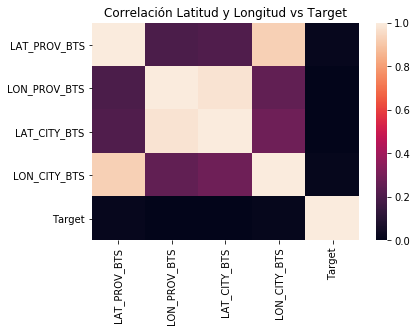

In [ ]:
lat_lon = fulldata[['LAT_PROV_BTS','LON_PROV_BTS', 'LAT_CITY_BTS','LON_CITY_BTS', 'Target']]
matrcorr_lat_lon = lat_lon.corr()
ax = sns.heatmap(matrcorr_lat_lon, vmin = 0)
ax.set_title("Correlación Latitud y Longitud vs Target")

Los valores de correlacion son muy cerca de cero, portanto consideramos que esas columnas no aportaran valor para el modelo y iremos borrarlas.

## 3.2 Segmento de valor del cliente

In [ ]:
fulldata['VALUE_SEGMENT'].unique()

array(['3 - SILVER', '4 - BRONZE', '1 - PLATINUM', '2 - GOLD'],
      dtype=object)

Text(0.5, 1.0, 'Segmento de valor del cliente')

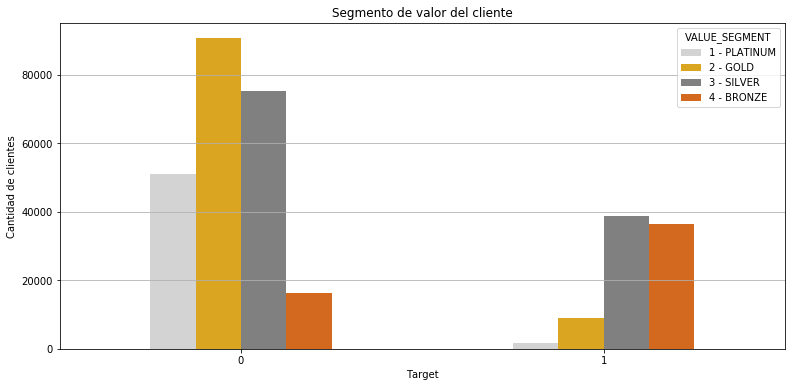

In [ ]:
ax = fulldata.groupby(['Target', 'VALUE_SEGMENT'])['VALUE_SEGMENT'].count().unstack(1).plot.bar(figsize = (13,6), color=["lightgrey", "goldenrod", "grey", "chocolate"])
ax.set_ylabel('Cantidad de clientes')
ax.grid(axis = 'y')
plt.xticks(rotation="horizontal")
plt.title('Segmento de valor del cliente')


Son 4 las categorias de segmento de valor del cliente, siendo platinum la 'más alta' y bronze 'la mas baja'. De los clientes que se quedan, la mayoria pertence a la clase gold, seguidos por la clase silver y muy pocos de la clase bronze. Ya, de los clientes que se van, la mayoria se concentra en las clases silver y bronze, siendo muy pocos de las clases platinum y gold que dejan el negocio.
Se puede concluir que de los clientes que se van, la mayoria está concentrada en las segmentaciones inferiores, mientras de los que se quedan, la mayoría en las mas altas.

## 3.3 Segmentation y Microsegmentation

In [ ]:
fulldata['SEGMENTATION'].unique()

array(['2-PD', '7-LOW', '6-OH', '3-DO', '1-HCV', '5-PV', '4-VD'],
      dtype=object)

In [ ]:
fulldata['MICROSEGMENTATION'].unique()

array(['PD1', 'LOW3', 'LOW4', 'DO3', 'HCV1', 'PV1', 'DO4', 'LOW2', 'OH2',
       'OH4', 'VD3', 'DO1', 'PV3', 'OH3', 'DO2', 'PD2', 'HCV4', 'PD3',
       'OH1', 'VD2', 'HCV2', 'HCV3', 'PV2', 'VD1', 'LOW1'], dtype=object)

Las dos columnas son categoricas y se refieren a las segmentaciones de clientes. MICROSEGMENTATION detalla la columna de SEGMENTATION.

Text(0.5, 1.0, 'Segmentación de clientes')

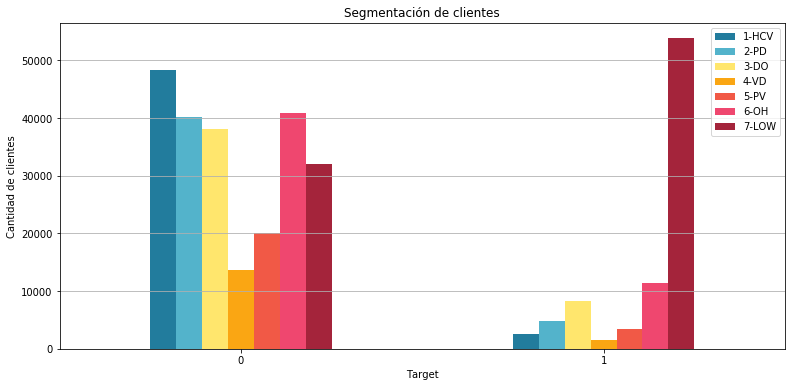

In [ ]:
#Segmentation
colors = ['#227c9d','#53b3cb', '#ffe66d', '#faa613', '#f15946', '#ef476f', '#a4243b']
ax = fulldata.groupby(['Target', 'SEGMENTATION'])['SEGMENTATION'].count().unstack(1).plot.bar(figsize = (13,6), color=colors)
ax.set_ylabel('Cantidad de clientes')
ax.grid(axis = 'y')
plt.xticks(rotation="horizontal")
plt.legend(loc = 'best')
plt.title('Segmentación de clientes')

In [ ]:
fulldata[fulldata['Target'] == 1]['SEGMENTATION'].value_counts(normalize=True)

7-LOW    0.626275
6-OH     0.132796
3-DO     0.096092
2-PD     0.057004
5-PV     0.039879
1-HCV    0.030235
4-VD     0.017718
Name: SEGMENTATION, dtype: float64

Los clientes son segmentados en 7 categorias.
Analizando la distribución de clientes en cada una de las 7 categorías de segmentación, verificamos que de los clientes que se van, la mayoría (62,6%), está en la clase mas baja (7-LOW). Para los clientes que se quedan la distribución no es tan discrepante, a no ser por los clientes en la segmentación intermediaria 4-VD y 5-PD.

Text(0.5, 1.0, 'Microsegmentación de Clientes')

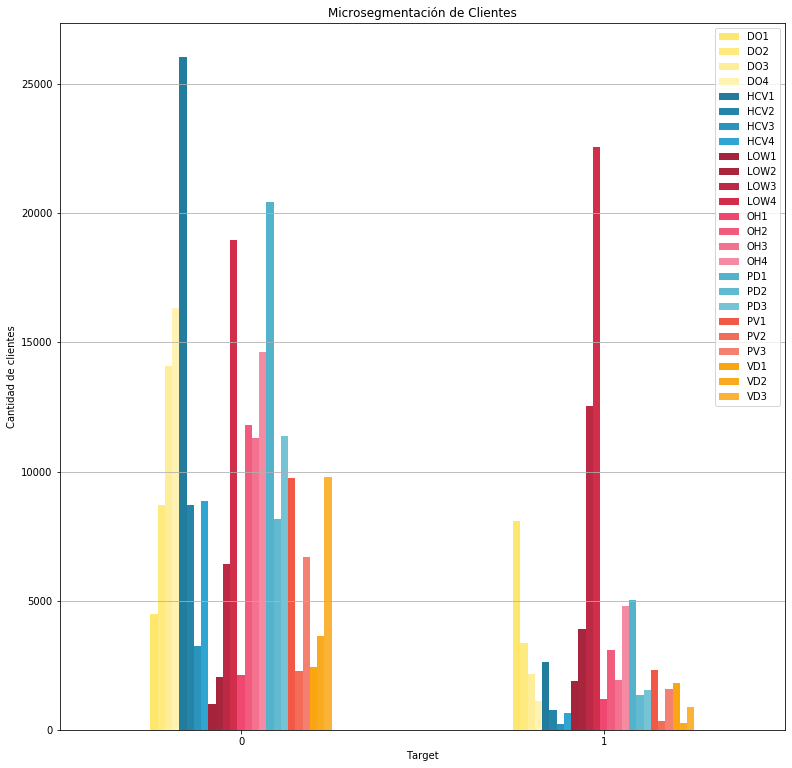

In [ ]:
#Microsegmentation
colors = ['#ffe66d', '#ffea80', '#ffee99', '#fff2b3',
          '#227c9d', '#2584a7', '#2995bc', '#2ea6d1',
          '#a4243b', '#a7253d', '#bc2944', '#d12e4c',
          '#ef476f', '#f15b7e', '#f37290', '#f58aa3',
          '#53b3cb', '#62bad0', '#76c3d6',
          '#f15946', '#f36b59', '#f48071',
          '#faa613', '#faaa1e', '#fbb337']
ax = fulldata.groupby(['Target', 'MICROSEGMENTATION'])['MICROSEGMENTATION'].count().unstack(1).plot.bar(figsize = (13,13), color = colors)
ax.set_ylabel('Cantidad de clientes')
ax.grid(axis = 'y')
plt.xticks(rotation="horizontal")
plt.legend(loc = 'best')
plt.title('Microsegmentación de Clientes')

Los datos de microsegmentacion son subcategorias derivadas de la segmentación. Como se verifica en el gráfico de arriba, el patrón de concentración de clientes es más o menos parecido con lo verificado en el gráfico de segmentación, con la mayoría de los clientes que se van en categorias LOW.
Como las dos variables aportan la misma información, optaremos por mantener la columna SEGMENTATION.







## 3.4 Modelo de dispositivo, Marca de Dispositivo

**Modelo de dispositivo**

In [ ]:
fulldata['DEVICE_MODEL_NAME'].value_counts()

NOT_IDENTIFIED                           43057
GALAXY GRAND PRIME DUOS (SM-G532M DS)    33608
GALAXY GRAND NEO (GT-I9060C)              9270
GALAXY J7 DUOS LTE (SM-J700MDS)           7627
Y5 2018 (DRA-LX3)                         6642
                                         ...  
W302                                         1
XPERIA ZL C6502                              1
GALAXY S5 LTE (SM-G900FD)                    1
OPTIMUS L1 II (E410I)                        1
SGH-T959                                     1
Name: DEVICE_MODEL_NAME, Length: 2476, dtype: int64

In [ ]:
fulldata['DEVICE_MODEL_NAME'].nunique()

2476

En la base de datos son identificados 2476 diferentes modelos de dispositivo. Consideramos que esa variable no aporta valor al estudio, así que no la utilizaremos.

**Modelo de dispositivo**

In [ ]:
fulldata['DEVICE_VENDOR_NAME'].nunique()

233

In [ ]:
marca = fulldata['DEVICE_VENDOR_NAME'].value_counts(normalize=True)
marca.head()

SAMSUNG           0.503743
HUAWEI            0.173897
NOT_IDENTIFIED    0.135253
LG                0.051752
BLU               0.030797
Name: DEVICE_VENDOR_NAME, dtype: float64

En la base de datos existen 233 diferentes marcas de dispositivo, siendo la mayoría de los dispositivos (50,3%) de la marca SAMSUNG.

Consideramos que marca y modelo del dispositivo no son relevantes para el dataset pretendido. Además, son columnas de string, no aceptadas por el modelo de predicción. Así que no las utilizaremos.

## 3.5 Tecnologia de Red

In [ ]:
fulldata['NETWORK_TECH'].value_counts(normalize = True)

LTE    0.606979
3G     0.353381
2G     0.039640
Name: NETWORK_TECH, dtype: float64

Text(0.5, 1.0, 'Tecnología de Red')

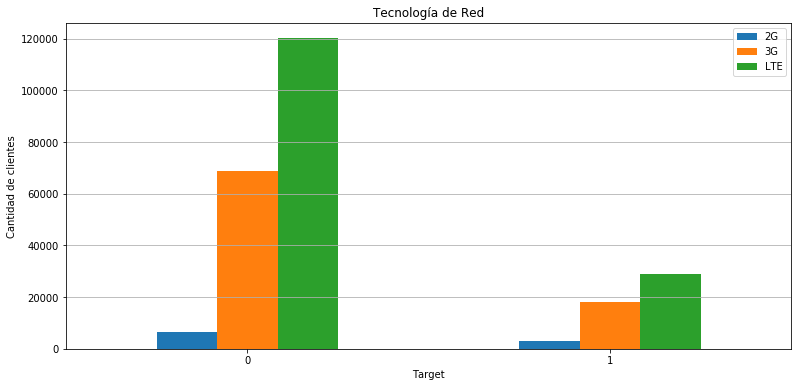

In [ ]:
ax = fulldata.groupby(['Target', 'NETWORK_TECH'])['NETWORK_TECH'].count().unstack(1).plot.bar(figsize = (13,6))
ax.grid(axis = 'y')
ax.set_ylabel('Cantidad de clientes')
plt.xticks(rotation="horizontal")
plt.legend(loc = 'best')
plt.title('Tecnología de Red')

Para los 2 diferentes targets, la mayoria de los clientes utiliza tecnología LTE, seguidos de 3G y 2G.

## 3.6 Antiguedad

In [ ]:
tenure = fulldata[['TENURE_CUSTOMER','TENURE_CUSTOMER_BL']]
tenure.head()

,TENURE_CUSTOMER,TENURE_CUSTOMER_BL
0,8,8
1,5,5
2,21,21
3,6,6
4,35,35


In [ ]:
tenure.describe()

,TENURE_CUSTOMER,TENURE_CUSTOMER_BL
count,319222.000000,319222.000000
mean,29.975719,29.975719
std,18.281638,18.281638
min,4.000000,4.000000
25%,12.000000,12.000000
50%,29.000000,29.000000
75%,52.000000,52.000000
max,99.000000,99.000000


Verificamos que las columnas TENURE_CUSTOMER y TENURE_CUSTOMER_BL son iguales. Así que nos quedaremos solo con la columnas TENURE_CUSTOMER

Text(0, 0.5, 'Cantidad de clientes')

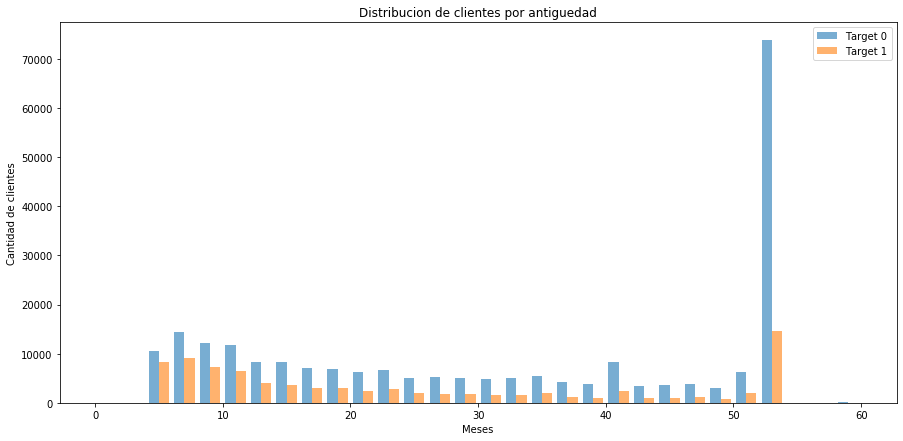

In [ ]:
#Distribución de os meses de antiguedad para los clientes Target 1
target_0 = fulldata[fulldata["Target"] == 0]["TENURE_CUSTOMER"]
target_1 = fulldata[fulldata["Target"] == 1]["TENURE_CUSTOMER"]
plt.figure(figsize=(15,7))
plt.hist([target_0, target_1],range=(0,60), bins=30, alpha=0.6)
plt.title('Distribucion de clientes por antiguedad')
plt.legend(['Target 0', 'Target 1'])
plt.xlabel('Meses')
plt.ylabel('Cantidad de clientes')

In [ ]:
antiguedad = fulldata[['TENURE_CUSTOMER', 'Target']]
antiguedad.head(10)

,TENURE_CUSTOMER,Target
0,8,1
1,5,1
2,21,0
3,6,0
4,35,1
5,52,0
6,44,1
7,14,0
8,52,0
9,52,0


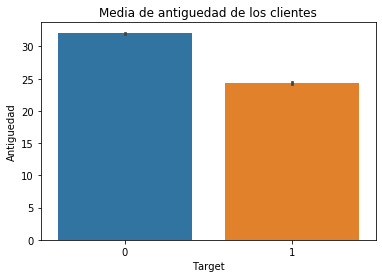

In [ ]:
#Grafico de la media de la Antiguedad de los clientes por target
ax = sns.barplot(data=fulldata, x = 'Target', y = "TENURE_CUSTOMER")
ax.set_title('Media de antiguedad de los clientes')
plt.ylabel('Antiguedad')
plt.show()

## 3.7 Monto de recargas acumuladas mensuales vs Cantidad de recargas acumuladas mensuales.

Se supone que las columnas PREP_RECH_AMT_X que nos indica el monto de recargas acumuladas mensuales y las columnas PREP_RECH_Q_EVT_X que indican cantidad de recargas acumuladas mensuales, aportan más o menos la misma información. 

Text(0.5, 1, 'Correlación: Monto vs Cantidad de Recargas')

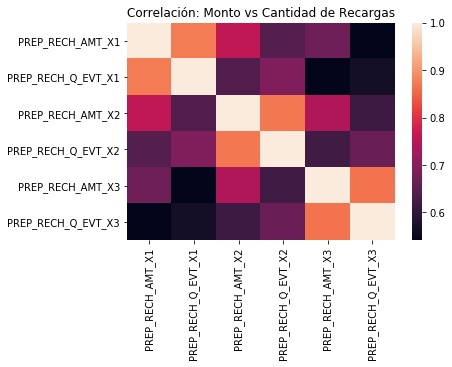

In [ ]:
#Verifica la correlacion de las variables
data_corr= fulldata[['PREP_RECH_AMT_X1', 'PREP_RECH_Q_EVT_X1', 
                     'PREP_RECH_AMT_X2', 'PREP_RECH_Q_EVT_X2', 
                     'PREP_RECH_AMT_X3', 'PREP_RECH_Q_EVT_X3']] 
corrmat_recargas = data_corr.corr()
ax = sns.heatmap(corrmat_recargas)
ax.set_title("Correlación: Monto vs Cantidad de Recargas")

Como nos muestra el heatmap, las variables PREP_RECH_AMT_X y PREP_RECH_Q_EVT_X están muy correlacionadas. Así, mantendremos solamente las columnas con la cantidad de cargas acumuladas mensuales PREP_RECH_Q_EVT_X.

## 3.8 Cantidad de recargas acumuladas por semana vs Cantidad de recargas acumuladas por mes


Se supone que las 12 columnas PREP_RECH_Q_EVT_Wx nos indican la cantidad de recargas acumuladas por semana, aportan la misma información que las columnas PREP_RECH_Q_EVT_X, de las cargas acumuladas mensuales:

In [ ]:
#Verificamos la soma total al final de las 12 semanas
weeks = fulldata[['PREP_RECH_Q_EVT_W1', 'PREP_RECH_Q_EVT_W2', 'PREP_RECH_Q_EVT_W3', 'PREP_RECH_Q_EVT_W4', 
                  'PREP_RECH_Q_EVT_W5', 'PREP_RECH_Q_EVT_W6', 'PREP_RECH_Q_EVT_W7', 'PREP_RECH_Q_EVT_W8', 
                  'PREP_RECH_Q_EVT_W9','PREP_RECH_Q_EVT_W10','PREP_RECH_Q_EVT_W11','PREP_RECH_Q_EVT_W12']]
weeks = weeks.reset_index()
weeks['suma'] = weeks[weeks.columns[1:]].sum(axis=1)
weeks.head()

,index,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,suma
0,0,0,0,4,4,3,6,0,3,4,0,0,0,24
1,1,0,0,0,0,0,0,0,0,0,3,0,0,3
2,2,3,3,3,3,0,4,0,0,0,0,3,0,19
3,3,0,3,3,0,0,0,0,0,0,0,0,0,6
4,4,3,0,0,3,0,3,0,3,0,3,0,0,15


In [ ]:
#Verificamos la soma al final de los 3 meses
months = fulldata[['PREP_RECH_Q_EVT_X1', 'PREP_RECH_Q_EVT_X2', 'PREP_RECH_Q_EVT_X3']]
months = months.reset_index()
months['suma'] = months[months.columns[1:]].sum(axis=1)
months.head()

,index,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,suma
0,0,6,8,4,18
1,1,0,0,3,3
2,2,6,4,3,13
3,3,4,0,0,4
4,4,4,4,3,11


Text(0.5, 1, 'Correlación: Recargas semanales vs Recargas Mensuales')

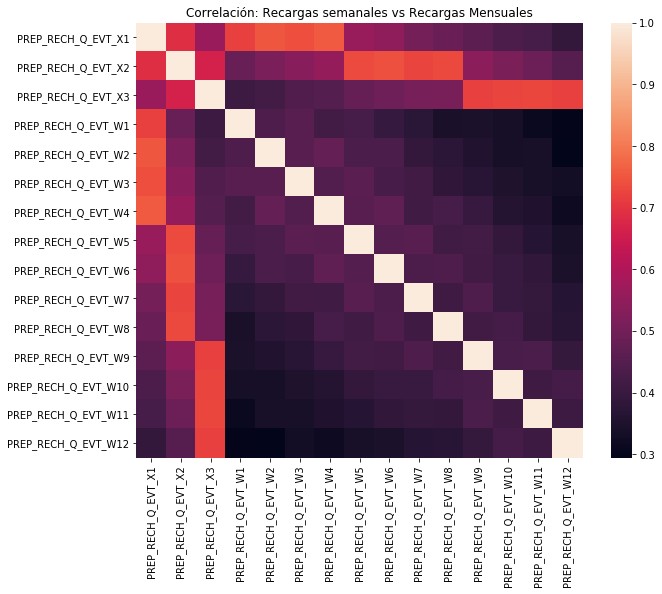

In [ ]:
cargas = fulldata[['PREP_RECH_Q_EVT_X1', 'PREP_RECH_Q_EVT_X2', 'PREP_RECH_Q_EVT_X3',
                  'PREP_RECH_Q_EVT_W1', 'PREP_RECH_Q_EVT_W2', 'PREP_RECH_Q_EVT_W3', 'PREP_RECH_Q_EVT_W4', 
                  'PREP_RECH_Q_EVT_W5', 'PREP_RECH_Q_EVT_W6', 'PREP_RECH_Q_EVT_W7', 'PREP_RECH_Q_EVT_W8', 
                  'PREP_RECH_Q_EVT_W9','PREP_RECH_Q_EVT_W10','PREP_RECH_Q_EVT_W11','PREP_RECH_Q_EVT_W12']]
cargas_corr = cargas.corr()

plt.figure(figsize = (10,8))
ax = sns.heatmap(cargas_corr)
ax.set_title("Correlación: Recargas semanales vs Recargas Mensuales")

A pesar de que el sumatorio de las recargas acumuladas al final de las 12 semanas (PREP_RECH_Q_EVT_Wx) es diferente del sumatorio de las recargas acumuladas mensuales ('PREP_RECH_Q_EVT_X), conforme se verifica arriba, las variables aportan el mismo valor como se supuso y comprobado por la fuerte correlación. Así que nos quedaremos solamente con las columnas de las recargas acumuladas mensuales, para dejar el dataset con el menor número de columnas.

#### Gráficos de cantidad de cargas mensuales 

Text(0.5, 0.98, 'Cantidad de cargas acumuladas mensuales')

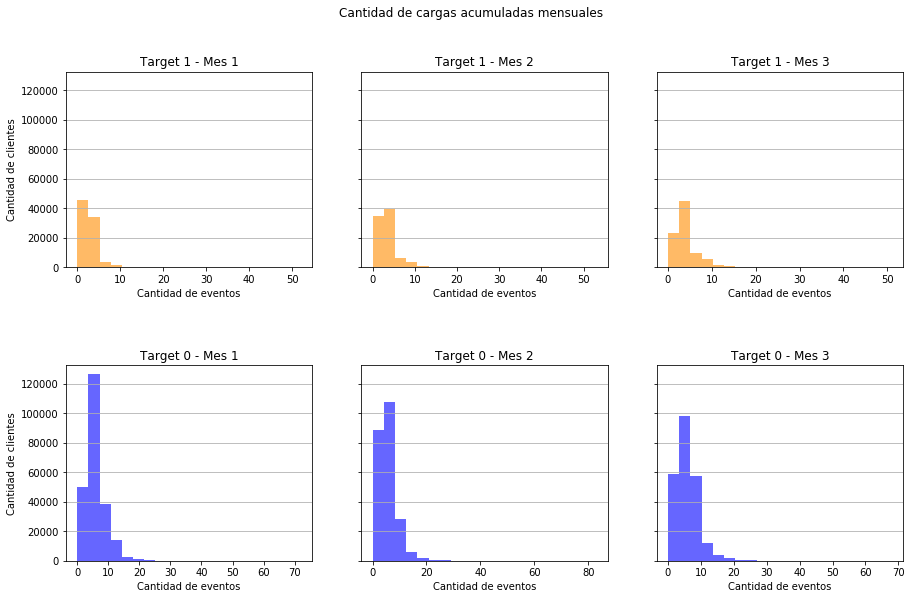

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, sharey = True, figsize=(15,9))

#Target 1
cargas_acumuladas_1 = fulldata[fulldata["Target"] == 1]["PREP_RECH_Q_EVT_X1"]
ax1.hist(cargas_acumuladas_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax1.set_title('Target 1 - Mes 1')
ax1.set_xlabel('Cantidad de eventos')
ax1.set_ylabel('Cantidad de clientes')
#ax1.set_xticks(ticks)
ax1.grid(axis = 'y')

cargas_acumuladas_1 = fulldata[fulldata["Target"] == 1]["PREP_RECH_Q_EVT_X2"]
ax2.hist(cargas_acumuladas_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax2.set_title('Target 1 - Mes 2')
ax2.set_xlabel('Cantidad de eventos')
ax2.grid(axis = 'y')

cargas_acumuladas_1 = fulldata[fulldata["Target"] == 1]["PREP_RECH_Q_EVT_X3"]
ax3.hist(cargas_acumuladas_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax3.set_title('Target 1 - Mes 3')
ax3.set_xlabel('Cantidad de eventos')
ax3.grid(axis = 'y')

#Target 0
cargas_acumuladas_0 = fulldata[fulldata["Target"] == 0]["PREP_RECH_Q_EVT_X1"]
ax4.hist(cargas_acumuladas_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax4.set_title('Target 0 - Mes 1')
ax4.set_xlabel('Cantidad de eventos')
ax4.set_ylabel('Cantidad de clientes')
ax4.grid(axis = 'y')

cargas_acumuladas_0 = fulldata[fulldata["Target"] == 0]["PREP_RECH_Q_EVT_X2"]
ax5.hist(cargas_acumuladas_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax5.set_title('Target 0 - Mes 2')
ax5.set_xlabel('Cantidad de eventos')
ax5.grid(axis = 'y')


cargas_acumuladas_0 = fulldata[fulldata["Target"] == 0]["PREP_RECH_Q_EVT_X3"]
ax6.hist(cargas_acumuladas_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax6.set_title('Target 0 - Mes 3')
ax6.set_xlabel('Cantidad de eventos')
ax6.grid(axis = 'y')


fig.subplots_adjust(hspace = 0.5)
fig.suptitle('Cantidad de cargas acumuladas mensuales')


## 3.9 Tráfico de datos

Se supone que las columnas TRD_Mx con las informaciones del tráfico de datos mensual es igual a la sumatoria de las columnas relacionadas con el detalle del trafico de datos (Streaming, redes sociales, etc..).

In [ ]:
#Suma de las columnas relacionadas con el detalle del trafico de datos
trafico_detalles = fulldata[['TRD_STR_M1', 'TRD_STR_M2', 'TRD_STR_M3',
                            'TRD_SN_M1','TRD_SN_M2', 'TRD_SN_M3',
                            'TRD_IM_M1', 'TRD_IM_M2', 'TRD_IM_M3',
                            'TRD_OTH_M1', 'TRD_OTH_M2', 'TRD_OTH_M3']]
trafico_detalles = trafico_detalles.reset_index()
trafico_detalles['suma'] = trafico_detalles[trafico_detalles.columns].sum(axis=1)
trafico_detalles.head(10)

,index,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRD_OTH_M1,TRD_OTH_M2,TRD_OTH_M3,suma
0,0,12538,1121,866,0,38,0,526,435,0,-13044.91,-1582.94,-863.00,33.15
1,1,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00
2,2,57,0,0,0,0,0,244,0,67,-296.58,0.00,-64.91,8.51
3,3,7,0,0,65,0,0,54,0,0,-119.86,0.00,0.00,9.14
4,4,667,2078,83,128,110,9,562,710,599,-1349.20,-2888.10,-684.12,28.58
5,5,983,634,628,1661,871,582,3056,1381,2294,-5686.11,-2875.11,-3493.32,40.46
6,6,289,0,0,149,0,0,232,0,0,-663.20,0.00,0.00,12.80
7,7,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,7.00
8,8,216,622,543,51,206,20,239,1473,737,-499.25,-2291.71,-1292.39,31.65
9,9,133,292,713,120,10,0,1124,1034,1011,-1369.10,-1327.47,-1715.44,33.99


In [ ]:
#Suma de las columnas col el trafico de datos mensual
trafico = fulldata[['TRD_M1', 'TRD_M2', 'TRD_M3']]
trafico = trafico.reset_index()
trafico['suma'] = trafico[trafico.columns].sum(axis=1)
trafico.head(10)

,index,TRD_M1,TRD_M2,TRD_M3,suma
0,0,15.09,5.06,1.00,21.15
1,1,0.00,0.00,0.00,1.00
2,2,0.42,0.00,0.09,2.51
3,3,0.14,0.00,0.00,3.14
4,4,1.80,3.90,0.88,10.58
5,5,7.89,4.89,4.68,22.46
6,6,0.80,0.00,0.00,6.80
7,7,0.00,0.00,0.00,7.00
8,8,0.75,3.29,1.61,13.65
9,9,1.90,2.53,4.56,17.99


A pesar de que el sumatorio de las columnas que representan los detalles del tráfico de datos es diferente del sumatorio del las columnas de los datos mensuales tienen muy alta correlación y aportan la misma información como se supuso. Por lo tanto, nos quedaremos solamente con las columnas TRD_Mx.

In [ ]:
trafico_detalles['suma'].corr(trafico['suma'])

0.9999999971612855

## 3.10 Tráfico de voz

**Tráfico de voz local**

In [ ]:
trafico_local = fulldata[['TRV_LCL_DUR_M1',  'TRV_LCL_DUR_M2',  'TRV_LCL_DUR_M3', 'Target']]
trafico_local.groupby('Target').describe()

TRV_LCL_DUR_M1                                                     \
                count        mean         std  min    25%    50%     75%   
Target                                                                     
0            233263.0  228.933924  450.146641  0.0  15.02  72.63  245.14   
1             85959.0   60.016127  243.089255  0.0   0.00   1.62   24.47   

                 TRV_LCL_DUR_M2              ...                    \
             max          count        mean  ...     75%       max   
Target                                       ...                     
0       18168.53       233263.0  220.432635  ...  230.10  14150.28   
1       18602.57        85959.0   93.312233  ...   51.58  12950.32   

       TRV_LCL_DUR_M3                                                      \
                count        mean         std  min    25%    50%      75%   
Target                                                                      
0            233263.0  204.565542  412.613199  0.0  11.15  59.67  213.310   
1             85959.0  103.848673  326.390124  0.0   0.00   9.93   63.425   

                  
             max  
Target            
0       15321.77  
1       13112.73  

[2 rows x 24 columns]

La media del tráfico local de voz en los últimos 3 meses es mucho menor para los clientes que se van, en comparación con los clientes que se quedan.

**Tráfico de voz Internacional**

In [ ]:
trafico_internacional = fulldata[['TRV_INTRNTL_DUR_M1', 'TRV_INTRNTL_DUR_M2', 'TRV_INTRNTL_DUR_M3', 'Target']]
trafico_internacional = trafico_internacional.reset_index()
trafico_internacional.groupby('Target').describe()

index                                                       \
           count           mean           std  min      25%       50%   
Target                                                                  
0       233263.0  159618.826290  92116.858496  2.0  79899.5  159541.0   
1        85959.0  159587.905327  92246.336031  0.0  79477.0  159823.0   

                           TRV_INTRNTL_DUR_M1            ...  \
             75%       max              count      mean  ...   
Target                                                   ...   
0       239312.5  319221.0           233263.0  0.964060  ...   
1       239696.0  319220.0            85959.0  0.328326  ...   

       TRV_INTRNTL_DUR_M2          TRV_INTRNTL_DUR_M3                       \
                      75%      max              count      mean        std   
Target                                                                       
0                     0.0  2325.12           233263.0  0.954261  16.861863   
1                     0.0  2010.52            85959.0  0.646294  13.110113   

                                     
        min  25%  50%  75%      max  
Target                               
0       0.0  0.0  0.0  0.0  3724.32  
1       0.0  0.0  0.0  0.0  2442.27  

[2 rows x 32 columns]

La media de trafico de voz internacional es muy baja para ambos clientes. Verificamos ahora entonces, el porcentaje de clientes que realizó ese tipo de llamada en los últimos 3 meses.

In [ ]:
#Suma las columnas de cantidad de datos en los 3 mese y assigna 'True' para las filas con trafico internacional con suma igual cero.
trafico_internacional['suma'] = trafico_internacional[trafico_internacional.columns[1:3]].sum(axis=1) == 0
trafico_internacional['suma'].value_counts(normalize=True)*100

True     93.689658
False     6.310342
Name: suma, dtype: float64

Verificamos que solo 6,31% de los clientes realiza llamadas internacionales. 
Consideramos que esa columna, por tener en su gran mayoria valores iguales a cero, no aporta valor al estudio, por lo que no la utilizaremos.

**Trafico de voz on net**

In [ ]:
trafico_onnet = fulldata[['TRV_ONNET_DUR_M1', 'TRV_ONNET_DUR_M2', 'TRV_ONNET_DUR_M3', 'Target']]
trafico_onnet.groupby('Target').describe()

TRV_ONNET_DUR_M1                                                   \
                  count        mean         std  min  25%    50%     75%   
Target                                                                     
0              233263.0  208.527168  442.550378  0.0  7.4  49.90  212.20   
1               85959.0   55.865014  240.773061  0.0  0.0   0.35   16.18   

                 TRV_ONNET_DUR_M2              ...                     \
             max            count        mean  ...      75%       max   
Target                                         ...                      
0       18155.35         233263.0  200.658625  ...  197.525  14150.28   
1       18559.12          85959.0   86.918765  ...   38.420  12933.42   

       TRV_ONNET_DUR_M3                                                    \
                  count        mean         std  min   25%    50%     75%   
Target                                                                      
0              233263.0  186.464044  405.052953  0.0  5.18  40.08  183.78   
1               85959.0   96.882940  323.062402  0.0  0.00   4.85   49.05   

                  
             max  
Target            
0       15315.18  
1       12985.67  

[2 rows x 24 columns]

**Tráfico de voz off net**

In [ ]:
trafico_offnet = fulldata[['TRV_OFFNET_DUR_M1',  'TRV_OFFNET_DUR_M2',  'TRV_OFFNET_DUR_M3', 'Target']]
trafico_offnet.groupby('Target').describe()

TRV_OFFNET_DUR_M1                                                \
                   count       mean        std  min   25%   50%    75%   
Target                                                                   
0               233263.0  21.370826  45.455546  0.0  0.53  7.17  26.25   
1                85959.0   4.479433  15.167693  0.0  0.00  0.00   2.78   

                TRV_OFFNET_DUR_M2             ...                  \
            max             count       mean  ...    75%      max   
Target                                        ...                   
0       2705.80          233263.0  20.704231  ...  25.07  9293.20   
1       2115.57           85959.0   6.956367  ...   5.88  2169.32   

       TRV_OFFNET_DUR_M3                                                \
                   count       mean       std  min   25%   50%     75%   
Target                                                                   
0               233263.0  19.055755  44.86607  0.0  0.22  5.67  22.670   
1                85959.0   7.612018  22.17314  0.0  0.00  0.48   6.525   

                 
            max  
Target           
0       3817.78  
1       2524.40  

[2 rows x 24 columns]

Los datos de trafico de voz on net y off net también tienen valores mucho mas bajos para los clientes que se van.





Se supone que las informaciones de las columnas relacionadas con el trafico de voz local voz local 'TRV_LCL_DUR_MX' y el internacional 'TRV_INTRNTL_DUR_MX' son practicamente las mismas representadas por las columnas de trafico de voz en la misma red 'TRV_ONNET_DUR_MX' y fuera de la red 'TRV_OFFNET_DUR_MX'.

In [ ]:
trafico_de_voz = fulldata[[
     'TRV_LCL_DUR_M1',  'TRV_LCL_DUR_M2',  'TRV_LCL_DUR_M3',
    'TRV_INTRNTL_DUR_M1', 'TRV_INTRNTL_DUR_M2', 'TRV_INTRNTL_DUR_M3',
    'TRV_ONNET_DUR_M1', 'TRV_ONNET_DUR_M2', 'TRV_ONNET_DUR_M3',
    'TRV_OFFNET_DUR_M1',  'TRV_OFFNET_DUR_M2',  'TRV_OFFNET_DUR_M3'    
]]

trafico_de_voz = trafico_de_voz.reset_index()
trafico_de_voz.head()

,index,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3
0,0,147.87,210.55,2.80,0.0,0.0,0.0,139.53,188.6,1.67,8.33,21.95,1.13
1,1,2.27,4.12,0.62,0.0,0.0,0.0,0.00,0.0,0.00,2.27,4.12,0.62
2,2,9.38,3.28,0.88,0.0,0.0,0.0,1.38,0.0,0.68,8.00,3.28,0.20
3,3,1.17,0.00,0.00,0.0,0.0,0.0,1.17,0.0,0.00,0.00,0.00,0.00
4,4,0.00,0.08,12.05,0.0,0.0,0.0,0.00,0.0,12.05,0.00,0.08,0.00


Text(0.5, 1, 'Correlación: Trafico de datos')

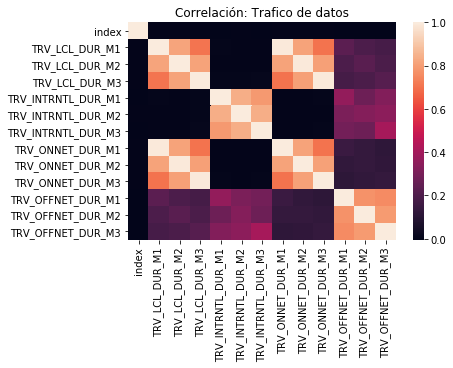

In [ ]:
#Verifica la correlacion de las variables
corrmat_trafico_voz = trafico_de_voz.corr()
ax = sns.heatmap(corrmat_trafico_voz)
ax.set_title("Correlación: Trafico de datos")

Como se suponía y comprobando a través del gráfico, las variables que representan el trafico local (TRV_LCL_DUR_M) y tráfico en la misma red (TRV_ONNET_DUR_MX') aportan la misma información. Las columnas referentes al trafico de datos fuera de la red (TRV_OFFNET_DUR_MX) y trafico de datos internacional (TRV_INTRNTL_DUR_MX), no están tan relacionadas como se esperaba.

Consideramos que las columnas de trafico fuera de la red, pueden aportar valor al estudio. Por lo que las dejaremos.

## 3.11 Pack de datos y voz

Se supone que las informaciones presentes en las columnas que informan sobre los montos de los packs de datos y voz, representan de cierta forma la misma informacion que las columnas que nos dicen la cantidad de los packs. Verificamos atráves de una matriz de correlacion:

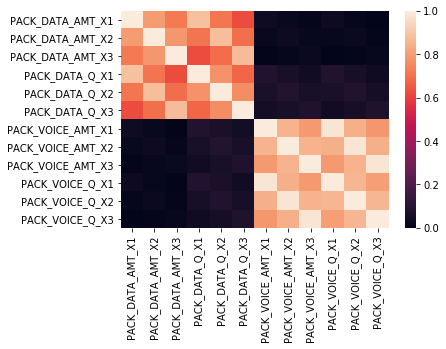

In [ ]:
packs = fulldata[[
    'PACK_DATA_AMT_X1', 'PACK_DATA_AMT_X2', 'PACK_DATA_AMT_X3',
    'PACK_DATA_Q_X1', 'PACK_DATA_Q_X2', 'PACK_DATA_Q_X3',
    'PACK_VOICE_AMT_X1', 'PACK_VOICE_AMT_X2', 'PACK_VOICE_AMT_X3',
    'PACK_VOICE_Q_X1', 'PACK_VOICE_Q_X2', 'PACK_VOICE_Q_X3',
]]

corrmat_packs = packs.corr()
sns.heatmap(corrmat_packs)

Conforme se suponia las columnas de monto de pack de datos y voz, están muy correlacionadas con sus respectivas columas de cantidad de packs. Así que manteremos somente las columnas que tendrían alguna relevancia son las que representan las cantidades (PACK_DATA_Q_X y PACK_VOICE_Q_X). Hacemos otra verificación:

In [ ]:
#Pack de voz
voice_q = fulldata[[x for x in fulldata.columns if 'PACK_VOICE_Q' in x]]
voice_q.describe()

,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12
count,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000
mean,1.129333,1.248542,1.322606,0.380459,0.391192,0.411654,0.414812,0.424028,0.435546,0.443428,0.454433,0.445173,0.463045,0.480525,0.476095
std,3.129627,3.382118,3.478229,1.233213,1.253968,1.299381,1.291620,1.321592,1.336620,1.350373,1.370918,1.351187,1.376257,1.403441,1.399590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.000000,46.000000,40.000000,13.000000,17.000000,15.000000,13.000000,16.000000,16.000000,16.000000,14.000000,13.000000,13.000000,18.000000,16.000000


In [ ]:
#Suma las columnas de cantidad de packs de voz en los 3 mese y assigna 'True' para las filas con suma igual cero.
pack_voz = fulldata[['PACK_VOICE_Q_X1', 'PACK_VOICE_Q_X2', 'PACK_VOICE_Q_X3', 'Target']]
pack_voz = pack_voz.reset_index()
pack_voz['suma'] = pack_voz[pack_voz.columns[1:3]].sum(axis=1)
#pack_voz['suma'].value_counts(normalize=True)*100

In [ ]:
#Classifica los datos
utiliza = (lambda row: 'Utiliza' if row > 0 else 'No Utiliza')
pack_voz['uso'] = pack_voz['suma'].apply(utiliza)
pack_voz.head()

,index,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,Target,suma,uso
0,0,0,0,0,1,0,No Utiliza
1,1,0,0,0,1,0,No Utiliza
2,2,0,0,0,0,0,No Utiliza
3,3,0,0,0,0,0,No Utiliza
4,4,0,0,0,1,0,No Utiliza


Text(0.5, 1.0, 'Uso de Pack de Voz \n Total de Clientes')

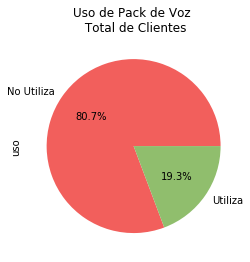

In [ ]:
#Total de clientes
colors = ['#f25f5c', '#90be6d']
ax = pack_voz['uso'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors)
ax.set_title('Uso de Pack de Voz \n Total de Clientes')

Text(0.5, 1.0, 'Uso de Pack de Voz \n Target 1')

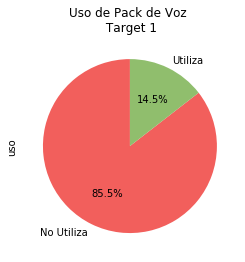

In [ ]:
#Target 1
colors = ['#f25f5c','#90be6d']
ax = pack_voz[pack_voz['Target'] == 1]['uso'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 90)
ax.set_title('Uso de Pack de Voz \n Target 1')

Text(0.5, 1.0, 'Uso de Pack de Voz \n Target 0')

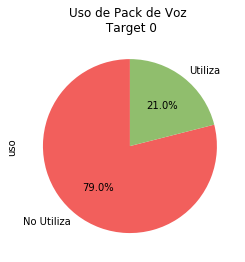

In [ ]:
#Target 1
colors = ['#f25f5c','#90be6d']
ax = pack_voz[pack_voz['Target'] == 0]['uso'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 90)
ax.set_title('Uso de Pack de Voz \n Target 0')

Del total de clientes, solo 19,3% utiliza packs de voz. Haciendo la division por target, de los clientes que se van solo 14.5% utiliza packs de voz.

Text(0.5, 0.98, 'Cantidad de packs de voz mensuales')

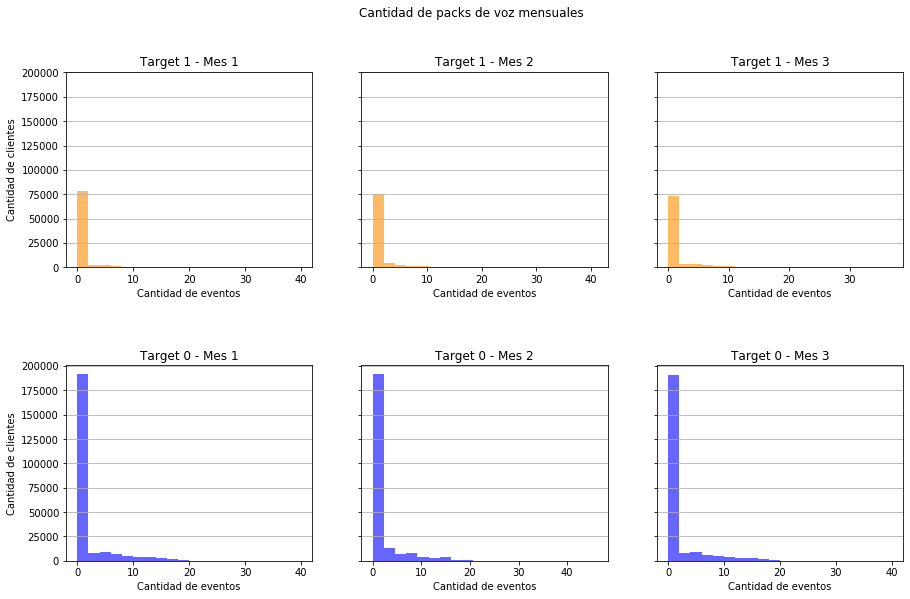

In [ ]:
#Gráfico para pack de voz

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, sharey = True, figsize=(15,9))

#Target 1
packs_1 = fulldata[fulldata["Target"] == 1]["PACK_VOICE_Q_X1"]
ax1.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax1.set_title('Target 1 - Mes 1')
ax1.set_xlabel('Cantidad de eventos')
ax1.set_ylabel('Cantidad de clientes')
ax1.grid(axis = 'y')

packs_1 = fulldata[fulldata["Target"] == 1]["PACK_VOICE_Q_X2"]
ax2.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax2.set_title('Target 1 - Mes 2')
ax2.set_xlabel('Cantidad de eventos')
ax2.grid(axis = 'y')

packs_1 = fulldata[fulldata["Target"] == 1]["PACK_VOICE_Q_X3"]
ax3.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax3.set_title('Target 1 - Mes 3')
ax3.set_xlabel('Cantidad de eventos')
ax3.grid(axis = 'y')


#Target 0
packs_0 = fulldata[fulldata["Target"] == 0]["PACK_VOICE_Q_X1"]
ax4.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax4.set_title('Target 0 - Mes 1')
ax4.set_xlabel('Cantidad de eventos')
ax4.set_ylabel('Cantidad de clientes')
ax4.grid(axis = 'y')

packs_0 = fulldata[fulldata["Target"] == 0]["PACK_VOICE_Q_X2"]
ax5.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax5.set_title('Target 0 - Mes 2')
ax5.set_xlabel('Cantidad de eventos')
ax5.grid(axis = 'y')

packs_0 = fulldata[fulldata["Target"] == 0]["PACK_VOICE_Q_X3"]
ax6.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax6.set_title('Target 0 - Mes 3')
ax6.set_xlabel('Cantidad de eventos')
ax6.grid(axis = 'y')


fig.subplots_adjust(hspace = 0.5)
fig.suptitle('Cantidad de packs de voz mensuales')


Verificamos que la mayoria de los valores de pack de voz son nulos. Así que no iremos considerar las columnas relacionadas con pack de voz ('PACK_VOICE_Q')

In [ ]:
#Pack de datos
data_q = fulldata[[x for x in fulldata.columns if 'PACK_DATA_Q' in x]]
data_q.describe()

,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12
count,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000
mean,3.448763,3.473263,3.617163,1.286168,1.421356,1.314609,1.461810,1.316463,1.416832,1.325297,1.451247,1.406000,1.406698,1.502356,1.426180
std,3.312361,3.287256,3.322686,1.672137,1.716669,1.685368,1.751109,1.694636,1.713747,1.687029,1.723813,1.718775,1.713723,1.738163,1.724279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,46.000000,47.000000,43.000000,16.000000,13.000000,13.000000,14.000000,19.000000,15.000000,15.000000,13.000000,13.000000,15.000000,14.000000,15.000000


Apesar de tener alguns datos nulos, considera-se que los otros valores aportados por las columnas de pack de datos seran relevantes para la predicción.

In [ ]:
#Suma las columnas de cantidad de packs de datos en los 3 mese y assigna
pack_datos = fulldata[['PACK_DATA_Q_X1', 'PACK_DATA_Q_X2', 'PACK_DATA_Q_X3', 'Target']]
pack_datos = pack_datos.reset_index()
pack_datos['suma'] = pack_datos[pack_datos.columns[1:3]].sum(axis=1)
pack_datos.head()

,index,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,Target,suma
0,0,4,5,4,1,9
1,1,0,0,0,1,0
2,2,5,3,3,0,8
3,3,3,0,0,0,3
4,4,3,4,3,1,7


In [ ]:
#Categoriza los datos
utiliza = (lambda row: 'Utiliza' if row > 0 else 'No Utiliza')
pack_datos['uso'] = pack_datos['suma'].apply(utiliza)

Text(0.5, 1.0, 'Uso de Pack de Datos \n Total de Clientes')

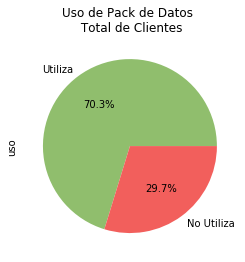

In [ ]:
#Total de clientes
colors = ['#90be6d', '#f25f5c']
ax = pack_datos['uso'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors)
ax.set_title('Uso de Pack de Datos \n Total de Clientes')

Text(0.5, 1.0, 'Uso de Pack de Datos \n Target 1')

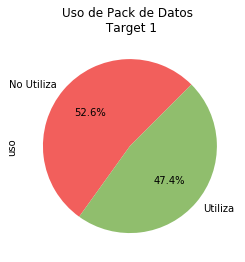

In [ ]:
#Target 1
colors = ['#f25f5c','#90be6d']
ax = pack_datos[pack_datos['Target'] == 1]['uso'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 45)
ax.set_title('Uso de Pack de Datos \n Target 1')

Text(0.5, 1.0, 'Uso de Pack de Datos \n Target 0')

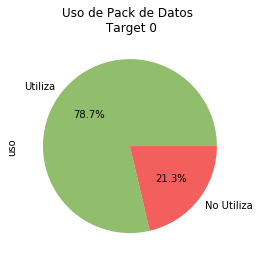

In [ ]:
#Target 0
colors = ['#90be6d', '#f25f5c']
ax = pack_datos[pack_datos['Target'] == 0]['uso'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors)
ax.set_title('Uso de Pack de Datos \n Target 0')

La mayoria del total de clientes utiliza packs de datos (70.25%). De los clientes que se van, casi la mitad (47.41%) utiliza packs de datos y de los que se quedan 78.66%.
La distribución de las cantidades es visualizada abajo.

Text(0.5, 0.98, 'Cantidad de packs de datos mensuales')

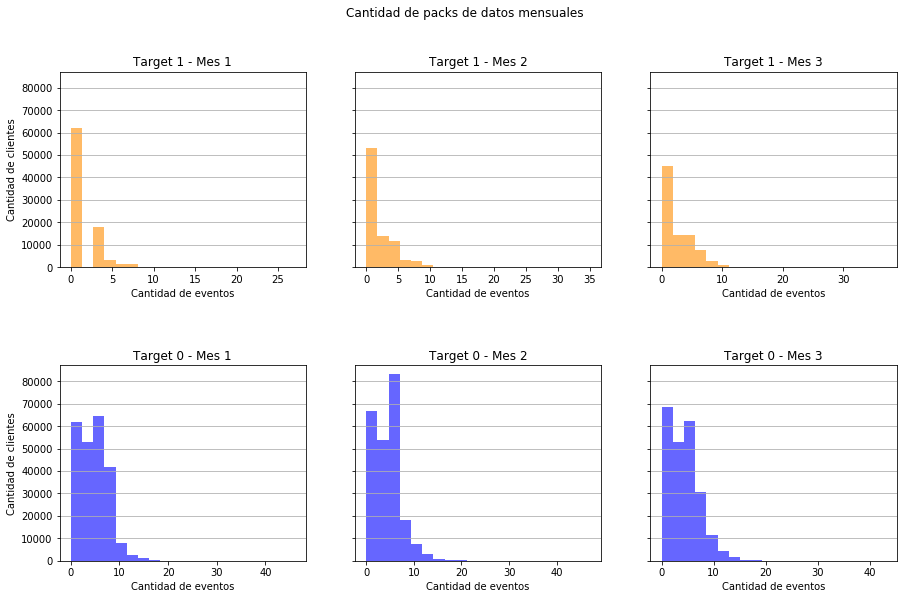

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, sharey = True, figsize=(15,9))

#Target 1
packs_1 = fulldata[fulldata["Target"] == 1]["PACK_DATA_Q_X1"]
ax1.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax1.set_title('Target 1 - Mes 1')
ax1.set_xlabel('Cantidad de eventos')
ax1.set_ylabel('Cantidad de clientes')
ax1.grid(axis = 'y')

packs_1 = fulldata[fulldata["Target"] == 1]["PACK_DATA_Q_X2"]
ax2.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax2.set_title('Target 1 - Mes 2')
ax2.set_xlabel('Cantidad de eventos')
ax2.grid(axis = 'y')

packs_1 = fulldata[fulldata["Target"] == 1]["PACK_DATA_Q_X3"]
ax3.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax3.set_title('Target 1 - Mes 3')
ax3.set_xlabel('Cantidad de eventos')
ax3.grid(axis = 'y')


#Target 0
packs_0 = fulldata[fulldata["Target"] == 0]["PACK_DATA_Q_X1"]
ax4.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax4.set_title('Target 0 - Mes 1')
ax4.set_xlabel('Cantidad de eventos')
ax4.set_ylabel('Cantidad de clientes')
ax4.grid(axis = 'y')

packs_0 = fulldata[fulldata["Target"] == 0]["PACK_DATA_Q_X2"]
ax5.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax5.set_title('Target 0 - Mes 2')
ax5.set_xlabel('Cantidad de eventos')
ax5.grid(axis = 'y')

packs_0 = fulldata[fulldata["Target"] == 0]["PACK_DATA_Q_X3"]
ax6.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax6.set_title('Target 0 - Mes 3')
ax6.set_xlabel('Cantidad de eventos')
ax6.grid(axis = 'y')


fig.subplots_adjust(hspace = 0.5)
fig.suptitle('Cantidad de packs de datos mensuales')


## 3.12 Pack de SMS

Sabemos que hoy, los SMS son cada vez menos utilizados. Así que verificaremos la relevancia de las columnas 'PACK_SMS_Q_WX' y 'PACK_SMS_AMT_WX' que nos da la informacion de la cantidad y el monto de packs semanales para SMS para el dataset pretendido.

In [ ]:
# Cantidad de packs de sms mensuales
sms_q = fulldata[[x for x in fulldata.columns if 'PACK_SMS_Q' in x]]
sms_q.describe()

,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12
count,319222.000000,319222.000000,319222.00000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000
mean,0.031207,0.033964,0.03881,0.008633,0.008978,0.008828,0.009962,0.009595,0.009974,0.009608,0.010870,0.010544,0.011127,0.011678,0.012527
std,0.333277,0.350899,0.37324,0.163008,0.166827,0.165307,0.175591,0.172562,0.176587,0.173032,0.183273,0.179980,0.185719,0.189889,0.197320
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,13.000000,14.00000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
# Monto de datos mensuales
sms_amt = fulldata[[x for x in fulldata.columns if 'PACK_SMS_AMT' in x]]
sms_amt.describe()

,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12
count,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000
mean,0.016429,0.018235,0.020578,0.003909,0.004133,0.003925,0.004463,0.004291,0.004588,0.004395,0.004961,0.004680,0.004992,0.005141,0.005765
std,0.223129,0.242334,0.250676,0.083901,0.089744,0.082509,0.090686,0.088617,0.093422,0.091235,0.095321,0.092366,0.094345,0.095289,0.106471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.650000,23.450000,20.400000,5.850000,8.850000,6.750000,7.800000,9.900000,8.800000,7.800000,7.800000,9.900000,6.850000,5.900000,14.850000


In [ ]:
#Suma las columnas de cantidad de packs de SMS  en los 3 mese y assigna
pack_SMS = fulldata[['PACK_SMS_Q_X1', 'PACK_SMS_Q_X2', 'PACK_SMS_Q_X3', 'Target']]
pack_SMS = pack_SMS.reset_index()
pack_SMS['suma'] = pack_SMS[pack_SMS.columns[1:3]].sum(axis=1)
pack_datos.head()

,index,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,Target,suma,uso
0,0,4,5,4,1,9,Utiliza
1,1,0,0,0,1,0,No Utiliza
2,2,5,3,3,0,8,Utiliza
3,3,3,0,0,0,3,Utiliza
4,4,3,4,3,1,7,Utiliza


In [ ]:
#Categoriza los datos
pack_SMS['uso'] = pack_SMS['suma'].apply(utiliza)

Text(0.5, 1.0, 'Uso de Pack de SMS \n Total de Clientes')

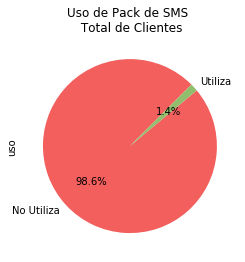

In [ ]:
#Total de clientes
colors = ['#f25f5c','#90be6d']
ax = pack_SMS['uso'].value_counts().plot.pie(autopct = '%1.1f%%', colors=colors, startangle = 45)
ax.set_title('Uso de Pack de SMS \n Total de Clientes')

Solo 1.4% del total de clientes utiliza packs de SMS.

Text(0.5, 0.98, 'Cantidad de packs de SMS mensuales')

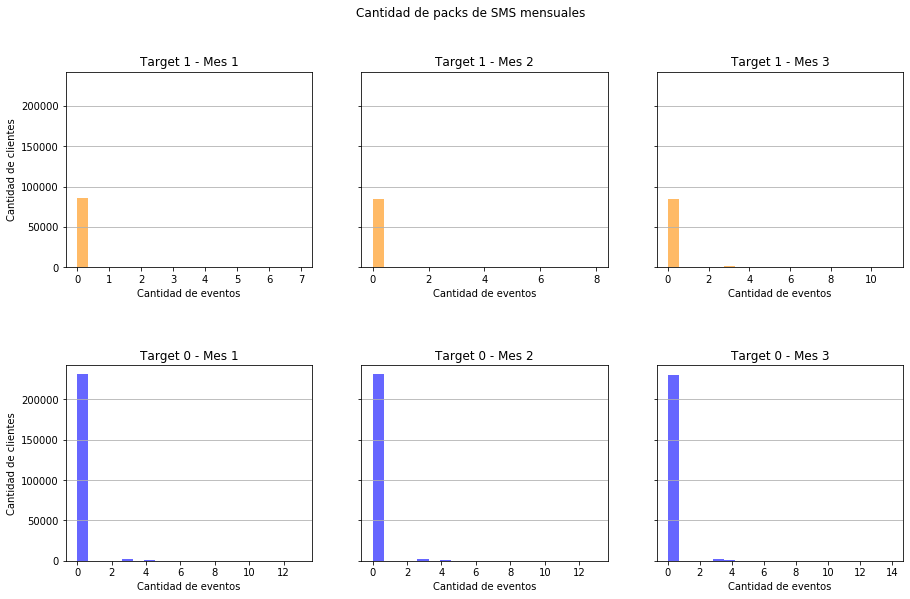

In [ ]:
#Gráfico pack SMS
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, sharey = True, figsize=(15,9))

#Target 1
packs_1 = fulldata[fulldata["Target"] == 1]["PACK_SMS_Q_X1"]
ax1.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax1.set_title('Target 1 - Mes 1')
ax1.set_xlabel('Cantidad de eventos')
ax1.set_ylabel('Cantidad de clientes')
ax1.grid(axis = 'y')

packs_1 = fulldata[fulldata["Target"] == 1]["PACK_SMS_Q_X2"]
ax2.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax2.set_title('Target 1 - Mes 2')
ax2.set_xlabel('Cantidad de eventos')
ax2.grid(axis = 'y')

packs_1 = fulldata[fulldata["Target"] == 1]["PACK_SMS_Q_X3"]
ax3.hist(packs_1, bins=20, alpha=0.6, label='Target', color = "darkorange" )
ax3.set_title('Target 1 - Mes 3')
ax3.set_xlabel('Cantidad de eventos')
ax3.grid(axis = 'y')


#Target 0
packs_0 = fulldata[fulldata["Target"] == 0]["PACK_SMS_Q_X1"]
ax4.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax4.set_title('Target 0 - Mes 1')
ax4.set_xlabel('Cantidad de eventos')
ax4.set_ylabel('Cantidad de clientes')
ax4.grid(axis = 'y')

packs_0 = fulldata[fulldata["Target"] == 0]["PACK_SMS_Q_X2"]
ax5.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax5.set_title('Target 0 - Mes 2')
ax5.set_xlabel('Cantidad de eventos')
ax5.grid(axis = 'y')

packs_0 = fulldata[fulldata["Target"] == 0]["PACK_SMS_Q_X3"]
ax6.hist(packs_0, bins=20, alpha=0.6, label='Target', color = "blue" )
ax6.set_title('Target 0 - Mes 3')
ax6.set_xlabel('Cantidad de eventos')
ax6.grid(axis = 'y')


fig.subplots_adjust(hspace = 0.5)
fig.suptitle('Cantidad de packs de SMS mensuales')


Verificamos que tanto para las columnas referentes a cantidad y para las referentes al monto de SMS, la mayoria de los valores son cero o muy próximos de cero. Así no iremos utilziar esas columnas en el dataset del modelo.

## 3.13 Cantidad de recargas por día de semana

In [ ]:
q_week = fulldata[['PREP_RECH_Q_MON_12W', 'PREP_RECH_Q_TUE_12W', 'PREP_RECH_Q_WEN_12W',
                   'PREP_RECH_Q_THUR_12W', 'PREP_RECH_Q_FRI_12W', 'PREP_RECH_Q_SAT_12W', 
                   'PREP_RECH_Q_SUN_12W']]
q_week.head()

,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W
0,4,4,4,3,3,3,5
1,0,0,3,0,0,0,0
2,3,3,3,3,0,3,4
3,0,3,0,0,0,0,3
4,0,3,3,3,0,4,0


In [ ]:
q_week.describe()

,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W
count,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000,319222.000000
mean,2.770473,2.484537,2.536645,2.655685,2.839980,2.566596,2.336622
std,2.633008,2.520506,2.517774,2.534744,2.589916,2.572251,2.470489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,39.000000,43.000000,38.000000,37.000000,38.000000,51.000000,38.000000


In [ ]:
#Soma los valores de cada dia de la semana
sum_colums = {col: q_week[col].sum() for col in q_week}
#Salva los valores en un dataframe
week_sum = pd.DataFrame(sum_colums, index=['Total'])
week_sum

,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W
Total,884396,793119,809753,847753,906584,819314,745901


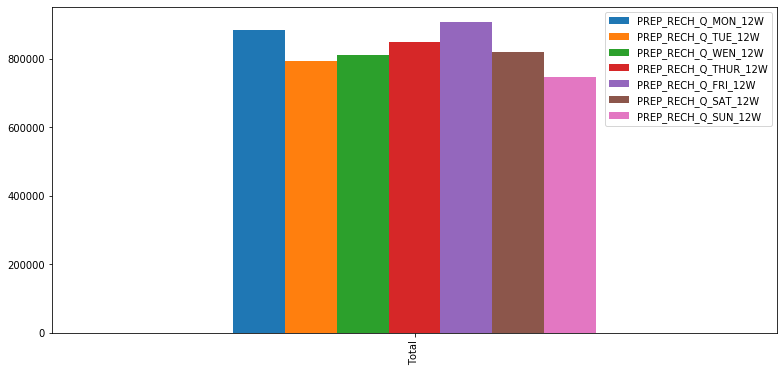

In [ ]:
week_sum.plot.bar(figsize=(13,6))

La media de las recargas para los dias de la semana es muy parecida, estando ente 2 y 3. Los dias de la semana con mayor numero de cargas son lunes y viernes.
Otras variables ya presentan informaciones relacionadas con la cantidad de cargas acumuladas, así que no consideraremos estas columnas para el modelo.

## 3.14 Canal más frecuente de recarga

In [ ]:
fulldata['PREP_RECH_CHNNL_MODE12W'].nunique()

7545

In [ ]:
fulldata['PREP_RECH_CHNNL_MODE12W'].value_counts()

UGW,1                   28600
UGW,2                   20108
UGW,3                   15596
UGW,4                   11772
UGW,5                    9534
                        ...  
MULE,19;N/A,7;UGW,6         1
EMG,46                      1
MULE,2;N/A,13;UGW,19        1
MULE,22;N/A,4;UGW,6         1
EMG,27;UGW,22               1
Name: PREP_RECH_CHNNL_MODE12W, Length: 7545, dtype: int64

Consideramos que los datos de canal más frecuente de carga, no aportan al modelo. Así que no lo consideramos.





# 4- Eliminacion de columnas innecesarias

## 4.1 Declaracion de funciones

* Creamos una función 'remove_columns_with_unique_values' a la cual le pasaremos como argumento un df y borraremos todas las columnas para las cuales tenemos valores unicos.

In [ ]:
def remove_columns_with_unique_values(df):
    columns_to_remove  = []
    for column in df.columns:
        if df[column].nunique() == 1:
            columns_to_remove.append(column)
        
    df.drop( columns = columns_to_remove, inplace = True )    
    print('Se borraron las columnas:')
    print(columns_to_remove)

 * Creamos una función 'remove_columns_by_name' a la cual le pasaremos como argumento un df y un string llamado 'name'. Esta funcion borra las columnas cuya descripcion contengan 'name.

In [ ]:
def remove_columns_by_name(df, name):
    columns_to_drop = [ x for x in df.columns if name in x ]
    df.drop(columns = columns_to_drop, inplace = True) 

## 4.2 Columnas con valores unicos

In [ ]:
remove_columns_with_unique_values(fulldata)
fulldata.shape

Se borraron las columnas:
['FECHA_CORTE', 'SOURCE']


(319222, 211)

## 4.3 Columnas  por conocimiento de dominio

Eliminamos columnas por conocimiento de dominio. Ya que el cliente especifico que no aportaban valor. Esta estan marcadas en el documento de descripcion del input como 'No Se Usa'.

In [ ]:
columns_to_remove = ["SPNDG_VOI_ONNET_ARPU_M1", "SPNDG_VOI_ONNET_ARPU_M2", "SPNDG_VOI_ONNET_ARPU_M3", "SPNDG_VOI_OFFNET_ARPU_M1",
"SPNDG_VOI_OFFNET_ARPU_M2", "SPNDG_VOI_OFFNET_ARPU_M3", "USE_LCL_VOI_AMT_M1", "USE_LCL_VOI_AMT_M2", "USE_LCL_VOI_AMT_M3",
"SPNDG_VOI_INTRNTL_ARPU_M1", "SPNDG_VOI_INTRNTL_ARPU_M2", "SPNDG_VOI_INTRNTL_ARPU_M3", "SMS_OFFNET_EXP_ARPU_AMT_M1",
"SMS_OFFNET_EXP_ARPU_AMT_M2", "SMS_OFFNET_EXP_ARPU_AMT_M3", "SMS_ONNET_EXP_ARPU_AMT_M1", "SMS_ONNET_EXP_ARPU_AMT_M2",
"SMS_ONNET_EXP_ARPU_AMT_M3", "EXPDTR_DATA_ARPU_AMT_M1", "EXPDTR_DATA_ARPU_AMT_M2", "EXPDTR_DATA_ARPU_AMT_M3"]
fulldata.drop( columns = columns_to_remove, inplace = True)

fulldata.shape

(319222, 190)

## 4.4 Columnas que no aportan al estudio de este dataset

Decidimos borrar las columnas cuyos datos son de latitud y longitud porque creemos que no aportan al estudio de este dataset.

In [ ]:
remove_columns_by_name(fulldata, 'LAT')
remove_columns_by_name(fulldata, 'LON')

fulldata.shape

(319222, 186)

Borramos las siguientes columnas Por tener su gran mayoria de valores en cero o no tener gran relevancia para el estudio (como se desmostro anteriormente) 

In [ ]:
# Borramos las columnas relacionadas a cantidad de pack de SMS mensual.
remove_columns_by_name(fulldata, 'PACK_SMS_Q_X')

# Borramos las columnas relacionadas al Monto de packs de SMS mensual.
remove_columns_by_name(fulldata, 'PACK_SMS_AMT_X')

# Borramos las columnas relacionadas a la cantidad y monto de packs de SMS semanal.
remove_columns_by_name(fulldata, 'PACK_SMS_Q_W')
remove_columns_by_name(fulldata, 'PACK_SMS_AMT_W')

# Borramos las columnas relacionadas al trafico de mensajes en la misma red. En este caso un medio muy poco usado hoy en dia.
remove_columns_by_name(fulldata, 'TRS_ONNET_SMS_M')

# Borramos las columnas relacionadas a la cantidad de pack voz mensual.
remove_columns_by_name(fulldata, 'PACK_VOICE_Q_X')

# Borramos las columnas relacionadas al monto de pack de voz mensual.
remove_columns_by_name(fulldata, 'PACK_VOICE_AMT_X')

# Borramos las columnas relacionadas a la cantodad de pack voz semanal.
remove_columns_by_name(fulldata, 'PACK_VOICE_Q_W')

# Borramos las columnas relacionadas al monto de pack de voz semanal.
remove_columns_by_name(fulldata, 'PACK_VOICE_AMT_W')

# Borramos la columna de Modelo de Dispositivo
remove_columns_by_name(fulldata, 'DEVICE_MODEL_NAME')
# Borramos la columna de Marca de Dispositivo
remove_columns_by_name(fulldata, 'DEVICE_VENDOR_NAME')

# Borramos la columna del trafico fuera de la red de SMS
remove_columns_by_name(fulldata, 'TRS_OFFNET_SMS_M')

# Borramos las columnas con cargas acumuladasen los dias de la semana.
remove_columns_by_name(fulldata, 'PREP_RECH_Q_MON_12W')
remove_columns_by_name(fulldata, 'PREP_RECH_Q_TUE_12W')
remove_columns_by_name(fulldata, 'PREP_RECH_Q_WEN_12W')
remove_columns_by_name(fulldata, 'PREP_RECH_Q_THUR_12W')
remove_columns_by_name(fulldata, 'PREP_RECH_Q_SAT_12W')
remove_columns_by_name(fulldata, 'PREP_RECH_Q_SUN_12W')
remove_columns_by_name(fulldata, 'PREP_RECH_Q_FRI_12W')

# Borramos las columnas de tipo de carga
remove_columns_by_name(fulldata, 'PREP_RECH_CHNNL_MODE12W')

fulldata.shape

(319222, 110)

## 4.5 Columnas con correlacion alta

Borramos las siguientes columnas, por tener estas una correlacion muy alta con otras columnas del dataset (como se demostro en la seccion anteriormente).

In [ ]:
# Borramos las columnas relacionadas al  monto de recargas acumuladas mensuales.
remove_columns_by_name(fulldata, 'PREP_RECH_AMT')

# Borramos las columnas relacionadas a la Cantidad de recargas acumuladas por semana. 
# Decidimos quedarnos con las columnas que tiene la cantidad de cargas acumuladas por mes
remove_columns_by_name(fulldata, 'PREP_RECH_Q_EVT_W')

# Borramos las columnas relacionadas al Monto acumulado de recargas por semana
remove_columns_by_name(fulldata, 'PREP_RECH_AMT_W')

# Borramos las columnas relacionadas al tráfico de Datos en Streaming Mensual
remove_columns_by_name(fulldata, 'TRD_STR_M')
# Borramos las columnas relacionadas al tráfico de Datos Redes Sociales Mensual
remove_columns_by_name(fulldata, 'TRD_SN_M')
# Borramos las columnas relacionadas al tráfico de Datos Mensajes por internet mensual
remove_columns_by_name(fulldata, 'TRD_IM_M')
# Borramos las columnas relacionadas al trafico de datos de otras fuentes mensual
remove_columns_by_name(fulldata, 'TRD_OTH_M')

# Borramos las columnas relacionadas al  trafico de voz local.
remove_columns_by_name(fulldata, 'TRV_LCL_DUR_M')
# Borramos las columnas relacionadas al  trafico de voz internacional.
remove_columns_by_name(fulldata, 'TRV_INTRNTL_DUR_M')

# Borramos las columnas relacionadas al monto de Pack de datos mensuales.
remove_columns_by_name(fulldata, 'PACK_DATA_AMT_X')

# Borramos las columnas relacionadas al monto de Packs de Datos Semanal.
remove_columns_by_name(fulldata, 'PACK_DATA_AMT_W')


#Borramos la columna TENURE_CUSTOMER_BL
remove_columns_by_name(fulldata, 'TENURE_CUSTOMER_BL')

#Borramos la columna MICROSEGMENTATION
remove_columns_by_name(fulldata, 'MICROSEGMENTATION')

fulldata.shape

(319222, 48)

## 4.6 Resultado

In [ ]:
fulldata.shape

(319222, 48)

In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319222 entries, 0 to 319221
Data columns (total 48 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SUSCRIBER_KEY                 319222 non-null  object 
 1   VALUE_SEGMENT                 319222 non-null  object 
 2   SEGMENTATION                  319222 non-null  object 
 3   NETWORK_TECH                  245814 non-null  object 
 4   COMMERCIAL_ACTIVATION_DATE    319222 non-null  object 
 5   TENURE_CUSTOMER               319222 non-null  int64  
 6   PREP_RECH_Q_EVT_X1            319222 non-null  int64  
 7   PREP_RECH_Q_EVT_X2            319222 non-null  int64  
 8   PREP_RECH_Q_EVT_X3            319222 non-null  int64  
 9   PREP_RECH_LAST_DAY_12W        319222 non-null  object 
 10  PREP_RECH_NDAYS_LASTRECH_12W  319222 non-null  int64  
 11  TRD_M1                        319222 non-null  float64
 12  TRD_M2                        319222 non-nul

# 5- Agrupado de columnas

## 5.1 Declaracion de funciones

* Creamos la función 'group_columns_by_name' a la cual le pasaremos como argumento un df, la parte de nombre comun a todas las columnas que queremos agrupar 'name_to_group' y el nuevo nombre en 'new_name' para la columna donde se encontrara la suma de todas las demas. Al finalizar el agrupamiento la funcion borra las columnas cuya descripcion contenga 'name_to_group'.

In [ ]:
def group_columns_by_name(df, name_to_group, new_name):
    columns_to_group = [ x for x in df.columns if name_to_group in x ]
    df[new_name] = df[columns_to_group].sum( axis = 1 )
    remove_columns_by_name(fulldata, name_to_group)

## 5.2 Desarrollo

Ahora nos concentraremos en agrupar las columnas cuya informacion se encuentra distribuida. Es decir realizaremos la sumatoria de estas por filas y guardaremos el resultado en una unica columna. Las columnas a agrupar son:

* TRV_ONNET_DUR_MX (3)  -> trafico de voz en la misma red (minutos). A estas tres columnas las agruparemos en una sola que se llamara TRV_ONNET_DUR


* TRV_OFFNET_DUR_MX (3) -> trafico de voz fuera de red(minutos). A estas tres columnas las agruparemos en una sola que se llamara TRV_OFFNET_DUR


*  PACK_DATA_Q_WX (12)  -> Cantidad de Packs de datos semanal. A estas doce columnas las agruparemos en una sola que se llamara PACK_DATA_Q

*  PACK_DATA_EXP_WX (12)  -> Expiración del pack de datos semanal. A estas doce columnas las agruparemos en una sola que se llamara PACK_DATA_EXP

In [ ]:
# Agrupacion de las columnas antes mencionadas.
group_columns_by_name(fulldata, 'TRV_ONNET_DUR_M', 'TRV_ONNET_DUR')
group_columns_by_name(fulldata, 'TRV_OFFNET_DUR_M', 'TRV_OFFNET_DUR')
group_columns_by_name(fulldata, 'PACK_DATA_Q_W', 'PACK_DATA_Q')
group_columns_by_name(fulldata, 'PACK_DATA_EXP_W', 'PACK_DATA_EXP')

## 5.3 Resultado

In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319222 entries, 0 to 319221
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SUSCRIBER_KEY                 319222 non-null  object 
 1   VALUE_SEGMENT                 319222 non-null  object 
 2   SEGMENTATION                  319222 non-null  object 
 3   NETWORK_TECH                  245814 non-null  object 
 4   COMMERCIAL_ACTIVATION_DATE    319222 non-null  object 
 5   TENURE_CUSTOMER               319222 non-null  int64  
 6   PREP_RECH_Q_EVT_X1            319222 non-null  int64  
 7   PREP_RECH_Q_EVT_X2            319222 non-null  int64  
 8   PREP_RECH_Q_EVT_X3            319222 non-null  int64  
 9   PREP_RECH_LAST_DAY_12W        319222 non-null  object 
 10  PREP_RECH_NDAYS_LASTRECH_12W  319222 non-null  int64  
 11  TRD_M1                        319222 non-null  float64
 12  TRD_M2                        319222 non-nul

In [ ]:
fulldata.head()

,SUSCRIBER_KEY,VALUE_SEGMENT,SEGMENTATION,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_LAST_DAY_12W,...,TRD_M2,TRD_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,Target,TRV_ONNET_DUR,TRV_OFFNET_DUR,PACK_DATA_Q,PACK_DATA_EXP
0,E_63734494_20190215,3 - SILVER,2-PD,LTE,15-FEB-19,8,6,8,4,19-AUG-19,...,5.06,1.00,4,5,4,1,329.80,31.41,17,47
1,E_66977552_20190518,4 - BRONZE,7-LOW,NaN,18-MAY-19,5,0,0,3,03-JUL-19,...,0.00,0.00,0,0,0,1,0.00,7.01,0,0
2,E_69159695_20180116,3 - SILVER,6-OH,3G,16-JAN-18,21,6,4,3,02-SEP-19,...,0.00,0.09,5,3,3,0,2.06,11.48,15,60
3,E_65255730_20190416,3 - SILVER,7-LOW,LTE,16-APR-19,6,4,0,0,01-SEP-19,...,0.00,0.00,3,0,0,0,1.17,0.00,3,6
4,E_67893872_20161201,3 - SILVER,3-DO,LTE,01-DEC-16,35,4,4,3,05-SEP-19,...,3.90,0.88,3,4,3,1,12.05,0.08,12,169


# 6- Limpieza del dataset

## 6.1 Declaracion de funciones

* Creamos la función 'get_norm_nulls' la cual recibe como parametro un df y nos devuelve una serie con las filas en donde tenemos valores nulls normalizado a la cantidad total de filas.

In [ ]:
def get_norm_nulls(df):
    # Guardamos en {'nombre_columna_1': cantidad_nulls_1, 'nombre_columna_2': cantidad_nulls_2, ...}  
    null_count = { col:df[col].isnull().sum() for col in df.columns }
    # Convierten los valores en una serie:
    missing = pd.Series(null_count)
    # Calculamos la cantidad de filas de nuestro df
    total_rows = fulldata.shape[0]
    #  Filtramos en donde tenemos solamente valores nulls y mostramos el grafico de barras.
    return missing[ missing > 0 ].div(total_rows)

* Creamos la función 'impute_nulls' la cual recibe como parametro un df y el nombre de la columna 'name' en la cual se imputaran los nulos. Si value es none se imputa al valor de la moda.

In [ ]:
def impute_nulls( df, col_name, value = None ):
    value_counts = fulldata[col_name].value_counts()
    moda = value_counts.index[0]
    fulldata.loc[ fulldata[col_name].isnull(), col_name ] =  ( moda if value is None else value)

* Creamos la función 'outlier_treatment' la cual recibe como parametro un df y limpia todos los Outliers de las columnas con el metodo IQR.

In [ ]:
def outlier_treatment(df):
    numerical_columns = df.select_dtypes(include=['int32','int64', 'float64']).columns
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        df.loc[ df[column] > (1.5*IQR), column ] = ( 1.5*IQR )
        df.loc[ df[column] < (-1.5*IQR), column] = ( -1.5*IQR )    

## 6.2 Limpieza de Duplicados

In [ ]:
fulldata.drop_duplicates().shape

(319222, 22)

## 6. 3 Inputación de valores nulos.

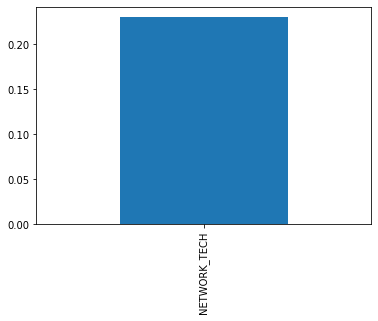

In [ ]:
# Vemos en un grafico los valores nulos por columna normalizados.
get_norm_nulls(fulldata).plot.bar() 

En el grafico se ve que tenemos valores nulos solo en la columna 'NETWORK_TECH' son nulos.

In [ ]:
# Vemos cuantos valores hay de cada tipo 
fulldata['NETWORK_TECH'].value_counts(normalize = True, dropna = False)

LTE    0.467399
3G     0.272118
NaN    0.229959
2G     0.030524
Name: NETWORK_TECH, dtype: float64

In [ ]:
# Atribuimos a los valores nulos el valor de la moda (en este caso LTE)
impute_nulls(fulldata, 'NETWORK_TECH')
fulldata['NETWORK_TECH'].value_counts(normalize = True, dropna = False)

LTE    0.697358
3G     0.272118
2G     0.030524
Name: NETWORK_TECH, dtype: float64

### 6.3.4 Resultado

In [ ]:
fulldata['NETWORK_TECH'].isnull().sum()

0

## 6.4 Irregulares y Outliers

### 6.4.1 Desarrollo  

A continuacion mostramos en boxplots con los cuales nos daremos cuanta que columnas tienen muchos Outliers que posteriormente trataremos.

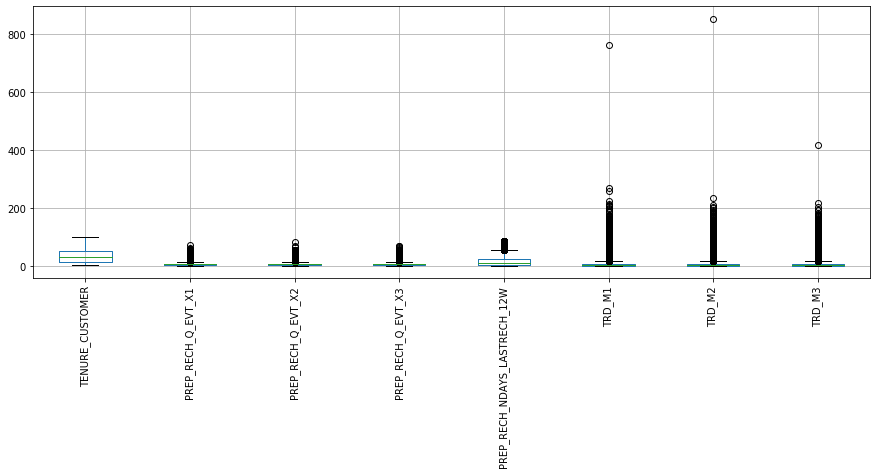

In [ ]:
fulldata.boxplot(['TENURE_CUSTOMER', 'PREP_RECH_Q_EVT_X1', 'PREP_RECH_Q_EVT_X2',
                  'PREP_RECH_Q_EVT_X3', 'PREP_RECH_NDAYS_LASTRECH_12W', 'TRD_M1',
                  'TRD_M2', 'TRD_M3'], rot = 90, figsize=(15,5))

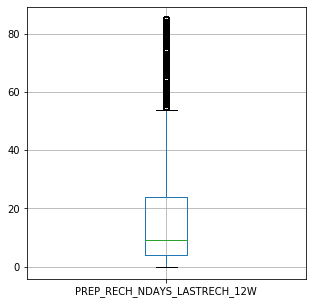

In [ ]:
fulldata.boxplot(['PREP_RECH_NDAYS_LASTRECH_12W'], rot = 0, figsize=(5,5))

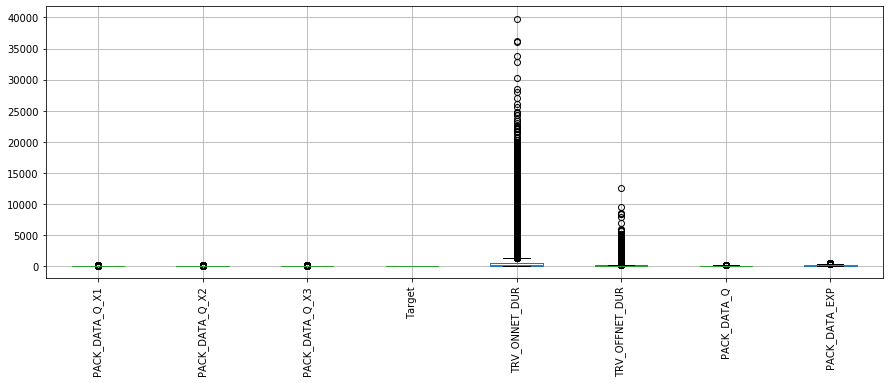

In [ ]:
fulldata.boxplot(['PACK_DATA_Q_X1', 'PACK_DATA_Q_X2',
                  'PACK_DATA_Q_X3', 'Target', 'TRV_ONNET_DUR', 'TRV_OFFNET_DUR',
                  'PACK_DATA_Q', 'PACK_DATA_EXP'], rot = 90, figsize=(15,5))

In [ ]:
# Hacemos la limpieza de outliers
outlier_treatment(fulldata)

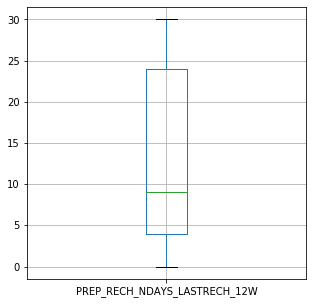

In [ ]:
fulldata.boxplot(['PREP_RECH_NDAYS_LASTRECH_12W'], rot = 0, figsize=(5,5))

### 6.4.2 Resultado

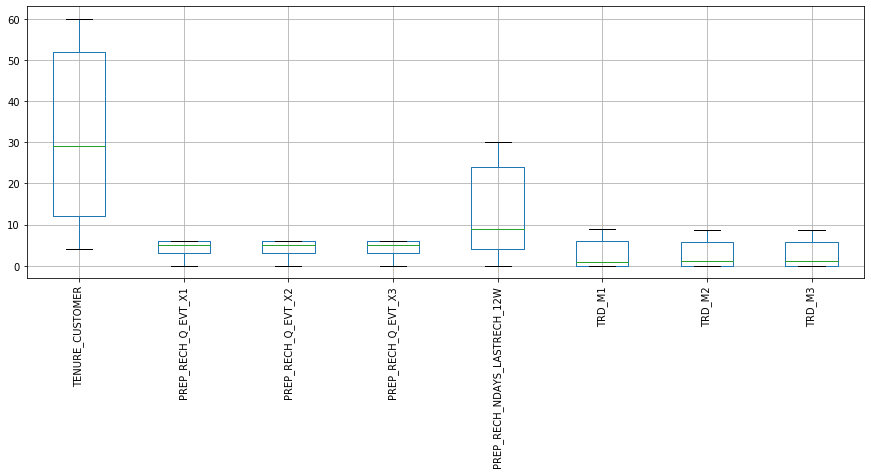

In [ ]:
fulldata.boxplot(['TENURE_CUSTOMER', 'PREP_RECH_Q_EVT_X1', 'PREP_RECH_Q_EVT_X2',
                  'PREP_RECH_Q_EVT_X3', 'PREP_RECH_NDAYS_LASTRECH_12W', 'TRD_M1',
                  'TRD_M2', 'TRD_M3'], rot = 90, figsize=(15,5))

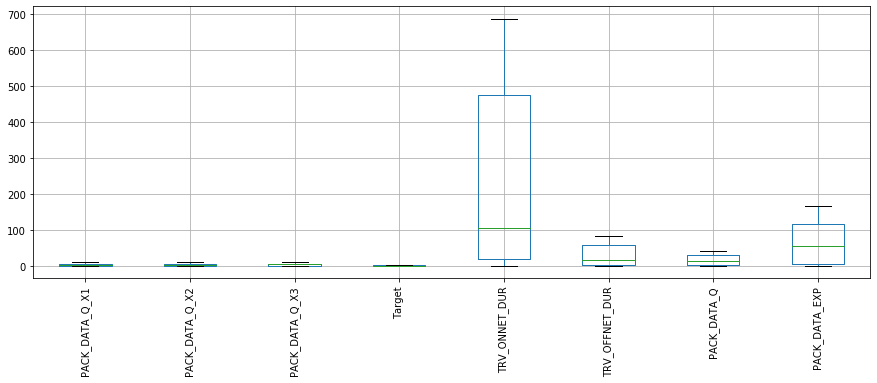

In [ ]:
fulldata.boxplot(['PACK_DATA_Q_X1', 'PACK_DATA_Q_X2',
                  'PACK_DATA_Q_X3', 'Target', 'TRV_ONNET_DUR', 'TRV_OFFNET_DUR',
                  'PACK_DATA_Q', 'PACK_DATA_EXP'], rot = 90, figsize=(15,5))

## 6.5 Transformación de Datos

### 6.5.1 Transformacion de object a datetime

Comenzaremos por trasformar las columnas que contengas fecha a tipo dateTime. En este caso la unica columna que tenemos es 'COMMERCIAL_ACTIVATION_DATE'

In [ ]:
# Verificamos el tipo de dato actual
fulldata['COMMERCIAL_ACTIVATION_DATE'].dtype

dtype('O')

In [ ]:
# Convierte el tipo objeto para tipo fecha
fulldata['COMMERCIAL_ACTIVATION_DATE'] = pd.to_datetime(fulldata['COMMERCIAL_ACTIVATION_DATE'], format='%d-%b-%y')
fulldata['COMMERCIAL_ACTIVATION_DATE']

0        2019-02-15
1        2019-05-18
2        2018-01-16
3        2019-04-16
4        2016-12-01
            ...    
319217   2019-01-21
319218   2017-10-17
319219   2015-07-01
319220   2018-10-10
319221   2015-08-14
Name: COMMERCIAL_ACTIVATION_DATE, Length: 319222, dtype: datetime64[ns]

### 6.5.2 Transformacion de string a numeric

Trasformaremos las columnas 'SUSCRIBER_KEY', 'VALUE_SEGMENT' y 'SEGMENTATION' que son de tipo categorica de la forma:

* 'VALUE_SEGMENT': '1 - PLATINUM', '2 - GOLD', '3 - SILVER', '4 - BRONZE'
* 'SEGMENTATION':  '1-HCV', '2-PD', '3-DO', '4-VD', '5-PV', '6-OH', '7-LOW'
* 'SUSCRIBER_KEY': 'E_63734494_20190215'

Las vamos a trasformar a tipo numerico.  

In [ ]:
fulldata['VALUE_SEGMENT'] = pd.to_numeric( fulldata['VALUE_SEGMENT'].str.split(' - ').str[0] )
fulldata['SEGMENTATION']  = pd.to_numeric( fulldata['SEGMENTATION'].str.split('-').str[0] )
fulldata['SUSCRIBER_KEY'] = pd.to_numeric(fulldata['SUSCRIBER_KEY'].str[2:10])

### 6.5.3 Resultado

In [ ]:
fulldata['VALUE_SEGMENT'].unique()

array([3, 4, 1, 2], dtype=int64)

In [ ]:
fulldata['SEGMENTATION'].unique()

array([2, 7, 6, 3, 1, 5, 4], dtype=int64)

In [ ]:
fulldata['SUSCRIBER_KEY'].dtype

dtype('int64')

In [ ]:
fulldata.head()

,SUSCRIBER_KEY,VALUE_SEGMENT,SEGMENTATION,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_LAST_DAY_12W,...,TRD_M2,TRD_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,Target,TRV_ONNET_DUR,TRV_OFFNET_DUR,PACK_DATA_Q,PACK_DATA_EXP
0,63734494,3,2,LTE,2019-02-15,8.0,6.0,6.0,4.0,19-AUG-19,...,5.06,1.00,4.0,5.0,4.0,1.0,329.80,31.41,17.0,47.0
1,66977552,4,7,LTE,2019-05-18,5.0,0.0,0.0,3.0,03-JUL-19,...,0.00,0.00,0.0,0.0,0.0,1.0,0.00,7.01,0.0,0.0
2,69159695,3,6,3G,2018-01-16,21.0,6.0,4.0,3.0,02-SEP-19,...,0.00,0.09,5.0,3.0,3.0,0.0,2.06,11.48,15.0,60.0
3,65255730,3,7,LTE,2019-04-16,6.0,4.0,0.0,0.0,01-SEP-19,...,0.00,0.00,3.0,0.0,0.0,0.0,1.17,0.00,3.0,6.0
4,67893872,3,3,LTE,2016-12-01,35.0,4.0,4.0,3.0,05-SEP-19,...,3.90,0.88,3.0,4.0,3.0,1.0,12.05,0.08,12.0,165.0


In [ ]:
fulldata.shape

(319222, 22)

# 7. Análisis de Datos II

## 7.1 Fecha de Activación

Analizemos mejor la columna COMMERCIAL_ACTIVATION_DATE

In [ ]:
fulldata['Dayofweek'] = fulldata['COMMERCIAL_ACTIVATION_DATE'].dt.dayofweek # obtenemos el dia de la semana (del 0 lunes al 6 domingo)
fulldata['Month'] = fulldata['COMMERCIAL_ACTIVATION_DATE'].dt.month # obtenemos el numero de mes
fulldata['Year'] = fulldata['COMMERCIAL_ACTIVATION_DATE'].dt.year # obtenemos el año
fulldata['Period'] = fulldata['COMMERCIAL_ACTIVATION_DATE'].dt.to_period('M') # obtenemos el periodo, en formato año/mes
fulldata.sort_values('COMMERCIAL_ACTIVATION_DATE', inplace=True) # ordenamos por fecha de activacion a los datos

In [ ]:
fulldata.head()

,SUSCRIBER_KEY,VALUE_SEGMENT,SEGMENTATION,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_LAST_DAY_12W,...,PACK_DATA_Q_X3,Target,TRV_ONNET_DUR,TRV_OFFNET_DUR,PACK_DATA_Q,PACK_DATA_EXP,Dayofweek,Month,Year,Period
171412,69866986,4,7,LTE,2011-07-10,60.0,0.0,3.0,3.0,24-JUL-19,...,0.0,0.0,6.89000,0.98,0.0,3.0,6,7,2011,2011-07
287516,65260584,3,1,3G,2011-07-10,60.0,6.0,3.0,3.0,30-AUG-19,...,0.0,0.0,688.42125,2.29,11.0,40.0,6,7,2011,2011-07
180405,67772066,1,3,3G,2011-11-25,60.0,6.0,6.0,6.0,05-SEP-19,...,9.0,0.0,47.73000,0.58,40.0,111.0,4,11,2011,2011-11
298876,66672859,2,3,LTE,2011-11-25,60.0,5.0,6.0,6.0,04-SEP-19,...,6.0,0.0,104.55000,49.91,34.0,130.0,4,11,2011,2011-11
255393,67605616,2,2,LTE,2012-04-22,60.0,6.0,4.0,4.0,06-SEP-19,...,4.0,0.0,26.63000,53.09,24.0,114.0,6,4,2012,2012-04


In [ ]:
pd.pivot_table(data=fulldata,
               index=['Year'],
               columns=['Month'],
               aggfunc=['size']
              )

size                                                               \
Month      1       2        3        4        5        6        7       8    
Year                                                                         
2011      NaN     NaN      NaN      NaN      NaN      NaN      2.0     NaN   
2012      NaN     NaN      NaN      5.0      3.0      NaN      NaN     NaN   
2013      NaN     NaN      NaN      NaN      2.0      NaN     24.0     NaN   
2014      NaN     NaN      NaN      NaN      NaN      NaN      NaN     NaN   
2015     14.0     NaN     14.0      NaN   2322.0  34682.0  55817.0  3208.0   
2016   2284.0  2160.0   2231.0   2261.0   6674.0   3943.0   2310.0  2569.0   
2017   3481.0  3245.0   3591.0   2967.0   3178.0   3743.0   3231.0  3511.0   
2018   4730.0  3945.0   5102.0   4927.0   4517.0   5194.0   5848.0  6149.0   
2019   9615.0  9536.0  11358.0  11440.0  13163.0   8855.0      NaN     NaN   

                                        
Month      9       10      11       12  
Year                                    
2011      NaN     NaN     2.0      NaN  
2012      7.0     NaN     NaN      NaN  
2013      NaN     NaN     NaN      NaN  
2014      NaN     NaN    49.0     73.0  
2015   1926.0  2068.0  1968.0   2829.0  
2016   2621.0  2846.0  2626.0   4515.0  
2017   3273.0  3790.0  3426.0   5582.0  
2018   5959.0  6395.0  6614.0  10802.0  
2019      NaN     NaN     NaN      NaN

Verificamos que los datos no son similares a lo largo del tiempo. La cantidad de lineas activadas anteriores a mayo tienen periodos de alta puntuales. Consideramos que algo anda mal con esos datos, así que vamos eliminar las filas que tengan fecha de activacion anteriores a mayo de 2015.

In [ ]:
period = pd.to_datetime('2015-05').to_period('M')
period

Period('2015-05', 'M')

In [ ]:
fulldata = fulldata[fulldata['Period']>=period]

Para mejor verificar como la cantidad de registros cambia a lo largo del tiempo, transformamos los valores para porcentaje, dividiendo los valores por el numero de filas del dataset.

In [ ]:
pivot_table = pd.pivot_table(fulldata,
               index=['Year'],
               columns=['Month'],
               aggfunc=['size']
              )

In [ ]:
total_rows = fulldata.shape[0]
total_rows

319027

In [ ]:
pivot_table.divide(total_rows) * 100

size                                                                \
Month        1         2         3         4         5          6          7    
Year                                                                            
2015        NaN       NaN       NaN       NaN  0.727838  10.871180  17.496011   
2016   0.715927  0.677059  0.699314  0.708717  2.091986   1.235946   0.724077   
2017   1.091130  1.017155  1.125610  0.930015  0.996154   1.173255   1.012767   
2018   1.482633  1.236572  1.599238  1.544383  1.415868   1.628075   1.833074   
2019   3.013851  2.989089  3.560200  3.585903  4.125983   2.775627        NaN   

                                                         
Month        8         9         10        11        12  
Year                                                     
2015   1.005558  0.603711  0.648221  0.616876  0.886759  
2016   0.805261  0.821561  0.892088  0.823128  1.415241  
2017   1.100534  1.025932  1.187987  1.073890  1.749695  
2018   1.927423  1.867867  2.004533  2.073179  3.385920  
2019        NaN       NaN       NaN       NaN       NaN

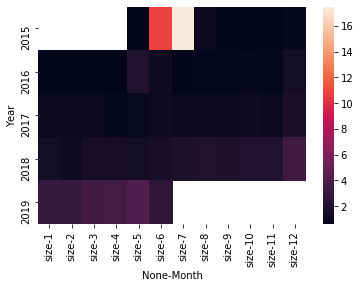

In [ ]:
sns.heatmap(pivot_table.divide(total_rows) * 100)

 Se nota que las cantidades de los periodos de junio y julio 2015 son muy superiores la cantidad de registros de los otros periodos. Consideramos que estos valores pueden indicar un problema en la coleccion de datos en el dataset. Así que los eliminaremos para no prejudicar la predicción del nuestro algoritmo.

In [ ]:
period = pd.to_datetime('2015-08').to_period('M')
period

Period('2015-08', 'M')

In [ ]:
fulldata = fulldata[fulldata['Period']>=period]

Por fin, eliminamos las columnas que habiamos creado anteriormente

In [ ]:
remove_columns_by_name(fulldata, 'Dayofweek')
remove_columns_by_name(fulldata, 'Month')
remove_columns_by_name(fulldata,'Year')
remove_columns_by_name(fulldata, 'Period')

In [ ]:
fulldata.head()

,SUSCRIBER_KEY,VALUE_SEGMENT,SEGMENTATION,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_LAST_DAY_12W,...,TRD_M2,TRD_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,Target,TRV_ONNET_DUR,TRV_OFFNET_DUR,PACK_DATA_Q,PACK_DATA_EXP
77309,66943912,2,1,3G,2015-08-01,51.0,5.0,6.0,6.0,24-AUG-19,...,4.07,2.83,5.0,9.0,7.0,0.0,297.27000,61.55,36.0,165.0
207954,67000758,3,5,LTE,2015-08-01,51.0,4.0,5.0,6.0,22-AUG-19,...,0.00,0.00,0.0,0.0,0.0,1.0,688.42125,19.64,0.0,0.0
146842,66970016,3,6,LTE,2015-08-01,51.0,6.0,5.0,3.0,08-SEP-19,...,0.00,0.00,0.0,0.0,0.0,0.0,117.65000,79.94,0.0,0.0
249043,66801857,3,7,LTE,2015-08-01,51.0,4.0,0.0,3.0,05-SEP-19,...,0.00,0.00,0.0,0.0,0.0,0.0,13.82000,11.75,0.0,0.0
288369,68875762,3,7,3G,2015-08-01,51.0,0.0,5.0,0.0,09-AUG-19,...,0.18,0.00,0.0,5.0,0.0,0.0,5.62000,4.04,9.0,28.0




## 7.2 Correlación con Target

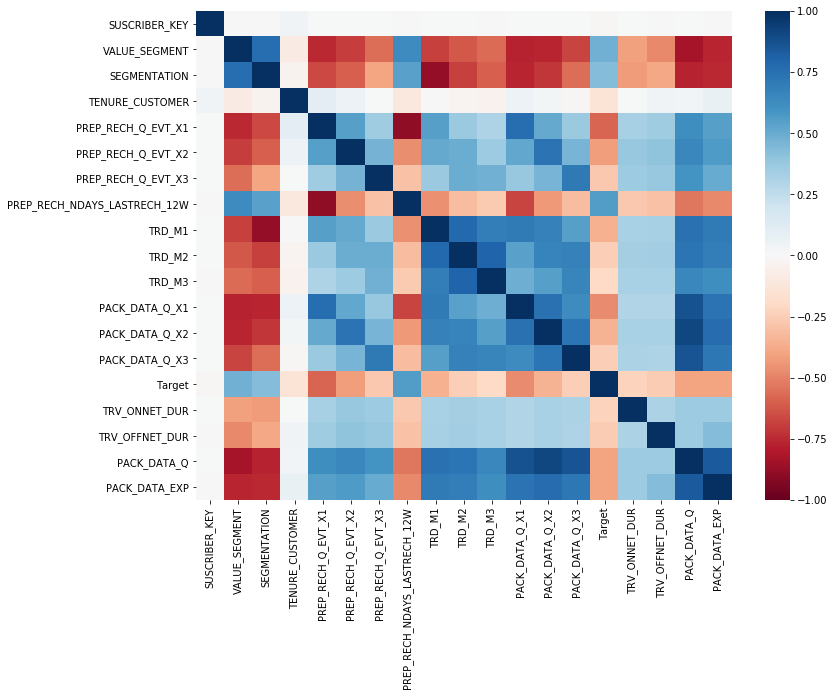

In [ ]:
plt.figure(figsize=(12, 9))
full_corrmat = fulldata.corr()
sns.heatmap(full_corrmat, center = 0, cmap="RdBu", vmin = -1)

In [ ]:
full_corr = fulldata.corr()
full_corr[['Target']].sort_values(by = 'Target', ascending = False).style.background_gradient()

,Target
Target,1.000000
PREP_RECH_NDAYS_LASTRECH_12W,0.559281
VALUE_SEGMENT,0.481130
SEGMENTATION,0.434937
SUSCRIBER_KEY,-0.008074
TENURE_CUSTOMER,-0.136445
TRD_M3,-0.198652
TRV_ONNET_DUR,-0.229858
TRD_M2,-0.245651
PACK_DATA_Q_X3,-0.249633


Verificamos que las variables Dias desde la última recarga, Segmento de Valor del cliente y Segmentación están fuertemente correladas con 'Target'.

# 8. Churn Prediction

Para predecir cuales clientes irán cargar o no en las próximas 4 semanas, utilizamos el modelo XGBoost.

In [ ]:
#Division del tag
y = fulldata['Target']
y.sample(5)

108789    0.0
23157     0.0
91630     1.0
92186     0.0
296821    0.0
Name: Target, dtype: float64

Crearemos la variable X que contendrá la informacion para el entrenamiento del modelo.
Quitamos las columnas SUSCRIBER_KEY y Target dentro de los datos de entrenamiento

In [ ]:
columns = [col for col in fulldata.columns if col not in [ 'SUSCRIBER_KEY', 'Target']]
X = fulldata[columns]
X.sample(5)

,VALUE_SEGMENT,SEGMENTATION,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,TRD_M1,TRD_M2,TRD_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,TRV_ONNET_DUR,TRV_OFFNET_DUR,PACK_DATA_Q,PACK_DATA_EXP
223925,3,6,LTE,2017-04-21,30.0,5.0,5.0,5.0,01-SEP-19,9.0,0.000,0.000,0.00,0.0,0.0,0.0,187.10,83.055,0.0,0.0
7156,2,6,LTE,2018-09-07,14.0,6.0,5.0,6.0,06-SEP-19,4.0,0.520,1.350,1.81,7.0,4.0,6.0,84.54,10.380,27.0,86.0
246765,4,6,2G,2019-05-13,5.0,0.0,3.0,0.0,11-AUG-19,30.0,0.050,0.030,0.02,0.0,0.0,0.0,0.00,0.000,0.0,0.0
152168,1,1,3G,2017-02-15,32.0,6.0,6.0,5.0,31-AUG-19,10.0,8.985,8.775,8.73,6.0,7.0,5.0,591.58,62.360,30.0,124.0
171073,3,2,LTE,2018-07-16,15.0,0.0,5.0,3.0,07-AUG-19,30.0,6.850,3.520,3.72,0.0,5.0,3.0,61.02,14.890,12.0,52.0


El modelo acepta solo valores numericos:

In [ ]:
X = X.select_dtypes(include=['int64','float64'])
X.sample(5)

,VALUE_SEGMENT,SEGMENTATION,TENURE_CUSTOMER,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_NDAYS_LASTRECH_12W,TRD_M1,TRD_M2,TRD_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,TRV_ONNET_DUR,TRV_OFFNET_DUR,PACK_DATA_Q,PACK_DATA_EXP
89662,3,7,48.0,3.0,0.0,0.0,23.0,0.00,0.00,0.00,0.0,0.0,0.0,139.72,5.45,0.0,0.0
125281,4,7,11.0,0.0,3.0,0.0,30.0,0.00,2.08,3.56,0.0,3.0,0.0,18.93,0.00,3.0,15.0
102227,3,6,5.0,4.0,0.0,5.0,13.0,0.88,6.17,1.20,4.0,0.0,4.0,11.90,10.19,10.0,31.0
6126,1,3,18.0,6.0,6.0,6.0,5.0,4.24,5.17,6.97,9.0,8.0,6.0,36.27,1.88,39.0,93.0
75974,3,5,30.0,6.0,3.0,5.0,5.0,0.14,0.16,0.37,4.0,3.0,3.0,567.00,1.25,12.0,36.0


Dividimos del dataset en un dataset de entrenamiento y uno de testeo con el método train_test_split y se lo asignamos a las distintas variables.

In [ ]:
from sklearn.model_selection import train_test_split # cargamos el metodo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [ ]:
X.shape

(226206, 17)

In [ ]:
y.shape

(226206,)

In [ ]:
X_train.shape

(56551, 17)

In [ ]:
y_train.shape

(56551,)

In [ ]:
X_test.shape

(169655, 17)

In [ ]:
y_test.shape

(169655,)

Cargamos el modelo

In [ ]:
xgb_model = xgb.XGBClassifier()

**Entrenamos**

In [ ]:
xgb_model.fit(X_train, y_train)

KeyError: 'base_score'

KeyError: 'base_score'

**Predecimos**

In [ ]:
XGB_preds = xgb_model.predict(X_test)

In [ ]:
XGB_preds

array([0., 0., 1., ..., 0., 1., 0.])

**Visualizamos el resultado**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, XGB_preds))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86    116939
         1.0       0.70      0.69      0.69     52716

    accuracy                           0.81    169655
   macro avg       0.78      0.78      0.78    169655
weighted avg       0.81      0.81      0.81    169655



In [ ]:
print("Matriz de confusión")
print("")
print(confusion_matrix(y_test, XGB_preds))

Matriz de confusión

[[101540  15399]
 [ 16496  36220]]


Text(0.5, 1.0, 'Target Dato')

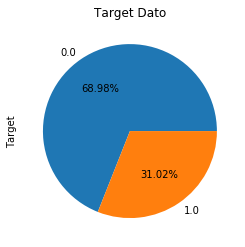

In [ ]:
fulldata['Target'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Target Dato')

In [ ]:
XGB_preds_list = XGB_preds.tolist()

In [ ]:
XGB_preds_list_boolean = [x==1 for x in XGB_preds_list]

In [ ]:
XGB_preds_True = XGB_preds_list_boolean.count(True)

In [ ]:
XGB_preds_False = XGB_preds_list_boolean.count(False)

Text(0.5, 1.0, 'Target Prediccion')

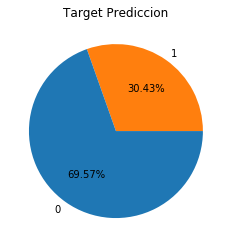

In [ ]:
plt.pie([XGB_preds_True, XGB_preds_False], labels=['1','0'], autopct='%.2f%%', colors=['#FF7F0E','#1F77B4'])
plt.title('Target Prediccion')

<h4> CURVA ROC </h4>

In [ ]:
XGB_preds_proba = xgb_model.predict_proba(X_test)

In [ ]:
XGB_preds_proba = XGB_preds_proba[:,[1]]

Text(0.5, 1.0, 'Curva ROC')

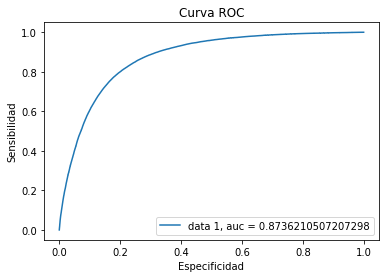

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, XGB_preds_proba)
auc = metrics.roc_auc_score(y_test, XGB_preds_proba)
plt.plot(fpr,tpr, label= "data 1, auc = " + str(auc))
plt.legend(loc=4)
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')

La Curva ROC de nuestro modelo es bastante buena, aproximandose lo suficiente a 1. Es decir, este modelo clasifica lo suficientemente bien nuestro target.

In [ ]:
list(zip(X_train.columns, xgb_model.feature_importances_))

[('VALUE_SEGMENT', 0.06279198),
 ('SEGMENTATION', 0.02478909),
 ('TENURE_CUSTOMER', 0.013187577),
 ('PREP_RECH_Q_EVT_X1', 0.5324858),
 ('PREP_RECH_Q_EVT_X2', 0.051905442),
 ('PREP_RECH_Q_EVT_X3', 0.020281183),
 ('PREP_RECH_NDAYS_LASTRECH_12W', 0.1650344),
 ('TRD_M1', 0.0126664145),
 ('TRD_M2', 0.01142662),
 ('TRD_M3', 0.011333836),
 ('PACK_DATA_Q_X1', 0.019545315),
 ('PACK_DATA_Q_X2', 0.01086313),
 ('PACK_DATA_Q_X3', 0.011033971),
 ('TRV_ONNET_DUR', 0.011708661),
 ('TRV_OFFNET_DUR', 0.010467933),
 ('PACK_DATA_Q', 0.013949963),
 ('PACK_DATA_EXP', 0.016528811)]

Text(0, 0.5, '')

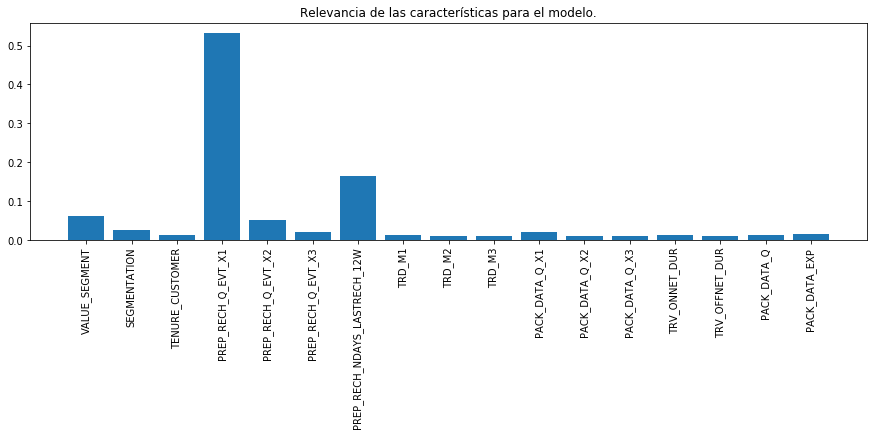

In [ ]:
plt.figure(figsize=(15,4))
ax = plt.subplot()
ax.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
ax.set_xticks(range(len(xgb_model.feature_importances_)))
ax.set_xticklabels(X_train.columns, rotation = 'vertical')
plt.title('Relevancia de las características para el modelo.')
plt.xlabel('')
plt.ylabel('')

La columna mas relevante para nuestro modelo es la columna PREP_RECH_Q_EVT_X1.